<div style="text-align: center; font-family: 'Times New Roman'; font-size: 30pt;">
    <strong>Superstore Sales</strong>
</div>



## Goal: Predicting Future Sales with Different Models

**Objective:**  
The objective of this project is to predict future sales accurately using various machine learning models. By leveraging historical sales data from the Superstore dataset, the goal is to build and evaluate different regression models that can effectively forecast sales for future periods.

**Steps and Approach:**

1. **Data Preparation:**
   - Load and preprocess the Superstore dataset.
   - Convert dates to datetime format and extract relevant features like month to capture seasonality.

2. **Exploratory Data Analysis (EDA):**
   - Explore sales trends across different dimensions such as state, region, category, and product.
   - Identify patterns, seasonality, and correlations within the dataset.

3. **Feature Engineering:**
   - Create additional features that may enhance model performance, such as trend components and seasonal indicators using Fourier series.

4. **Model Building:**
   - Implement various regression models to forecast sales, including:
     - **Linear Regression:** A baseline model to capture linear relationships.
     - **Random Forest Regression:** Utilizes ensemble learning for capturing non-linear relationships and feature interactions.
     - **Support Vector Machine (SVM) Regression:** Effective for handling complex, non-linear relationships in data.

5. **Model Evaluation:**
   - Evaluate each model using metrics such as R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), and others.
   - Compare models based on their performance on training and test datasets to ensure generalization and avoid overfitting.

6. **Forecasting:**
   - Generate forecasts for future sales periods using the best-performing model(s).
   - Visualize and interpret forecast results to understand trends and patterns.





# 1. Data Loading and Preprocessing

In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # for regression plot
import warnings

In [28]:
df = pd.read_csv('D:/Portfolio/train.csv')
# Tranform date to pandas datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d/%m/%Y')
# adding month feature
df['month'] = pd.to_datetime(df['Order Date']).dt.to_period('M')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,month
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10


# 2. Exploratory Data Analysis (EDA)

In [29]:
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [30]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
month             0
dtype: int64

In [31]:
df[df['Postal Code'].isnull()]
(df[df['City']=='Burlington']['Postal Code'].isnull()==True).index[0]


683

In [32]:

warnings.filterwarnings('ignore')
df['Postal Code'].fillna((df[df['City']=='Burlington']['Postal Code'].isnull()==True).index[0], inplace=True)

In [33]:
print('* There are stores in {} states'.format(len(df['State'].unique())))
print('* The are {} different products'.format(len(df['Product ID'].unique())))
print('* There are {} different categories'.format(len(df['Category'].unique())))
print('* There are {} different sub categories'.format(len(df['Sub-Category'].unique())))
print('* There are {} different ship mode'.format(len(df['Ship Mode'].unique())))

* There are stores in 49 states
* The are 1861 different products
* There are 3 different categories
* There are 17 different sub categories
* There are 4 different ship mode


# 3. Data Visualization


In [34]:
def sales_plot_by_group(group, top=50, color='blue'):    
    sales_by_group = df.groupby(group)['Sales'].sum() # group sales by feature
    sales_by_group.sort_values(ascending= False, inplace=True) # sort 
    sales_by_group = sales_by_group.head(top) # select top records
    plt.figure(figsize = (15,4)) 
    plt.title('Sales by {}'.format(group))
    plt.ylabel('Sales in USD')
    plt.bar(sales_by_group.index, sales_by_group, color=color, alpha = 0.5)
    plt.xticks(rotation=90)
# add sum of sales for each bar and place it in the center of the bar
    for x,y in sales_by_group.items():
        plt.text(x,sales_by_group.max()/2, f'${int(y):,.0f}', rotation=90, horizontalalignment='center', fontsize=12)
    plt.show


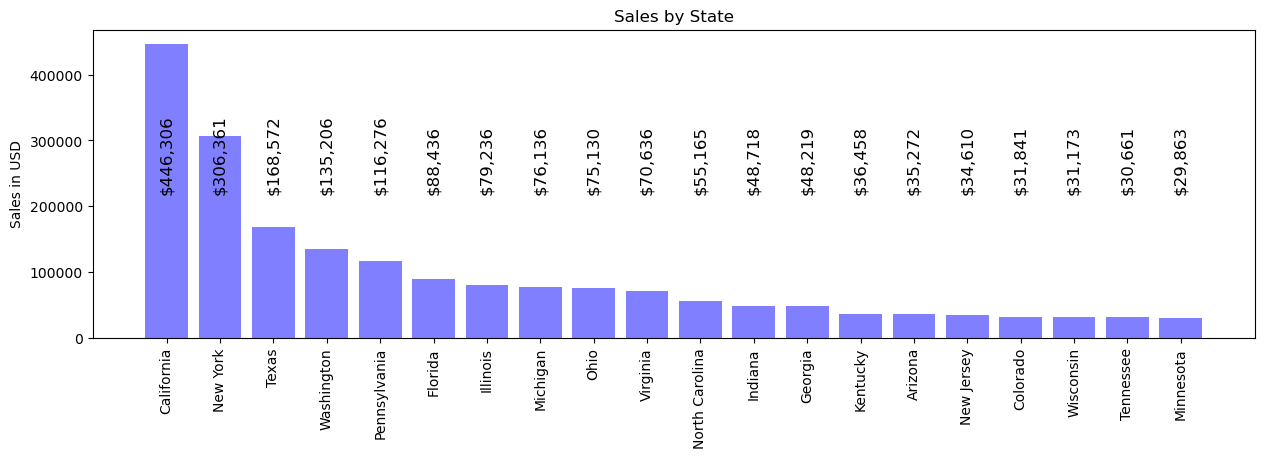

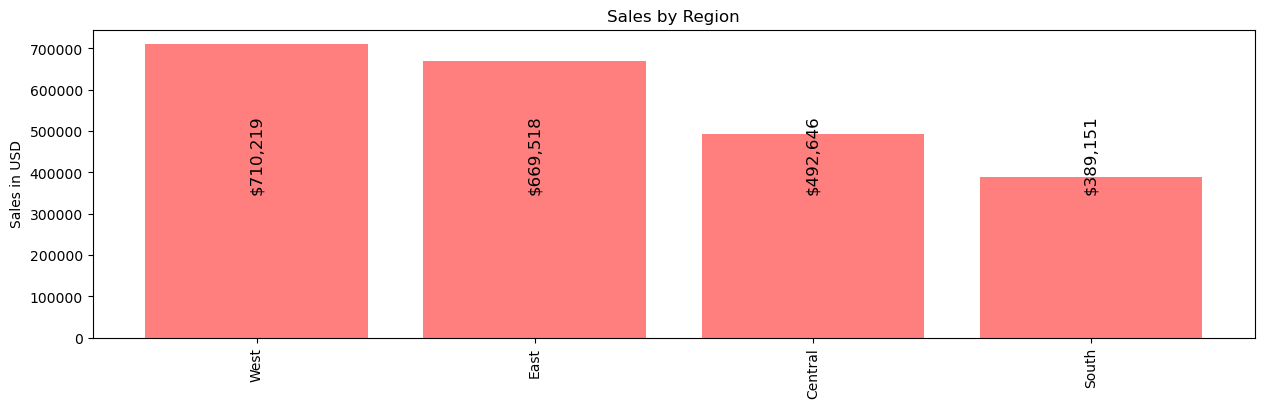

In [35]:
sales_plot_by_group('State',20, color='blue') # plot sales per state and show 20 top states
sales_plot_by_group('Region',color='red') # plot sales per region


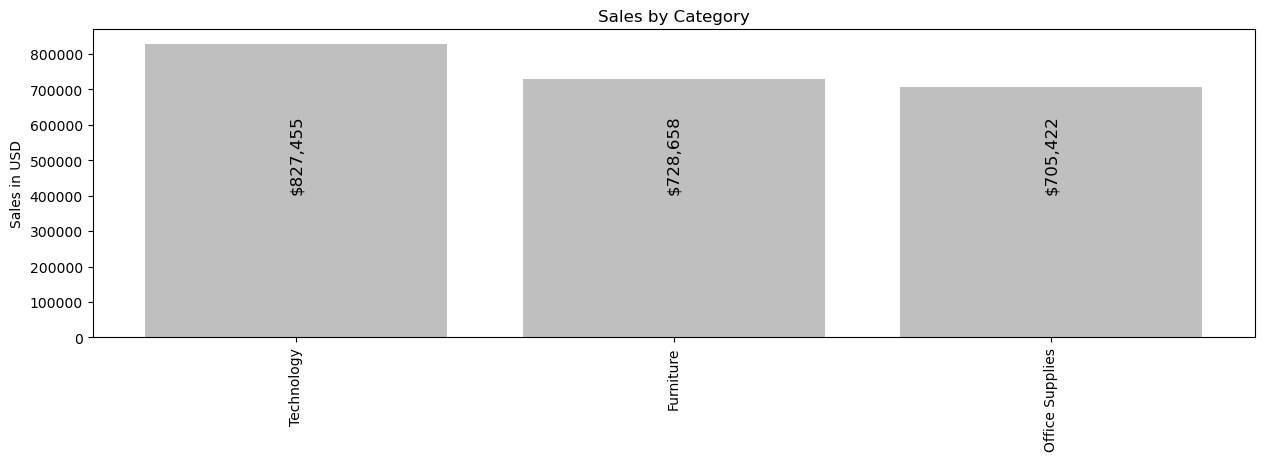

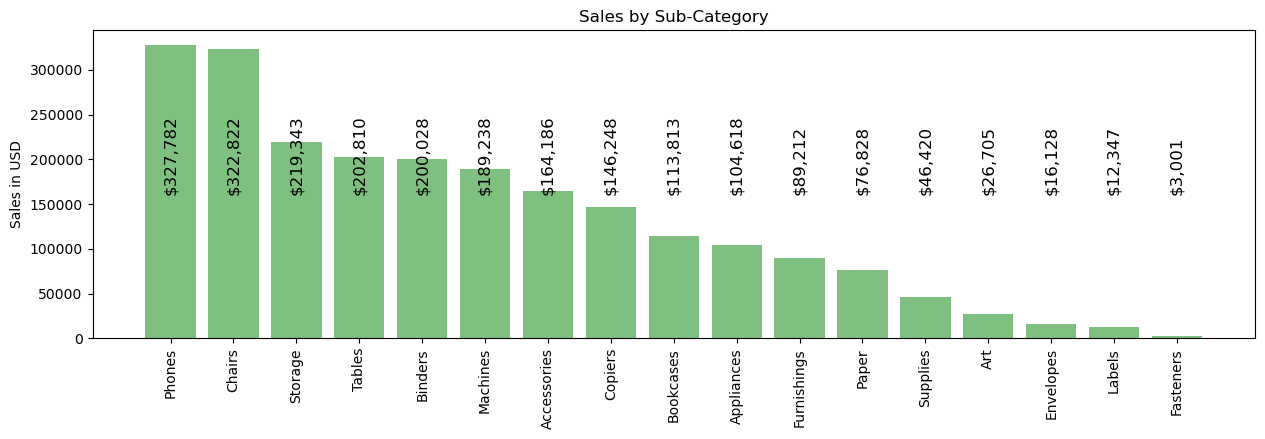

In [36]:
sales_plot_by_group('Category',color ='gray') # plot sales by category
sales_plot_by_group('Sub-Category',color='green') # plot sales by sub-category


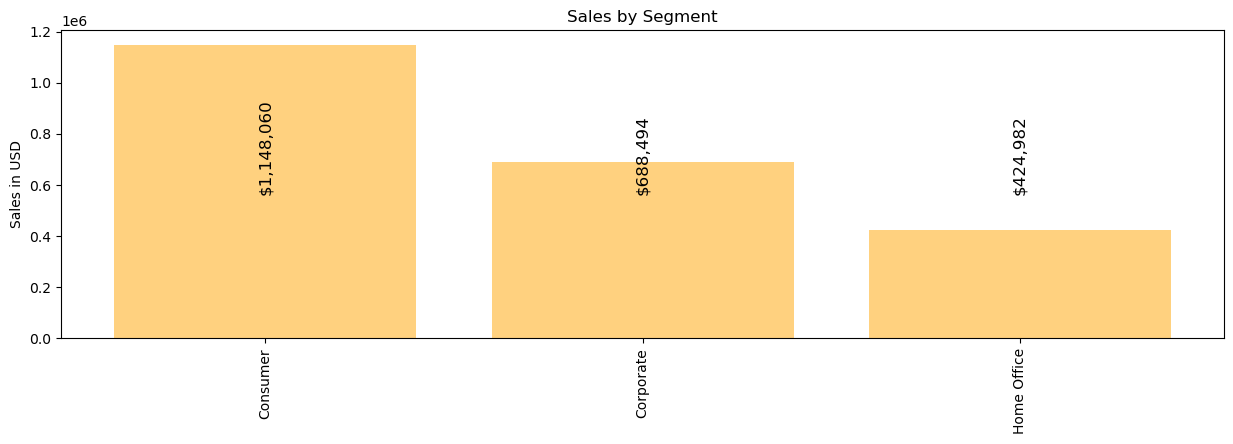

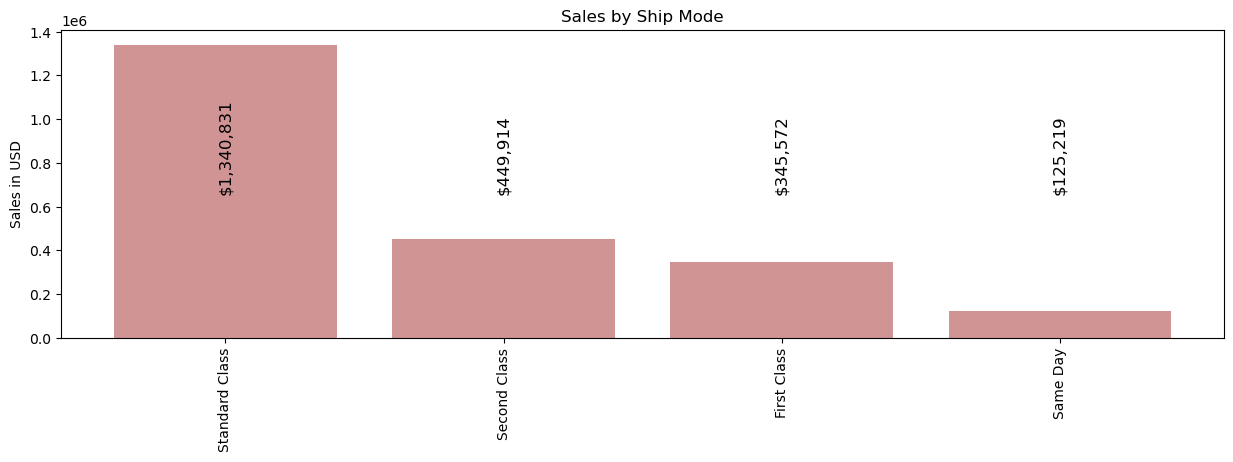

In [37]:
sales_plot_by_group('Segment',color='orange') # plot sales by segment
sales_plot_by_group('Ship Mode',color='brown') # plot sales by ship mode


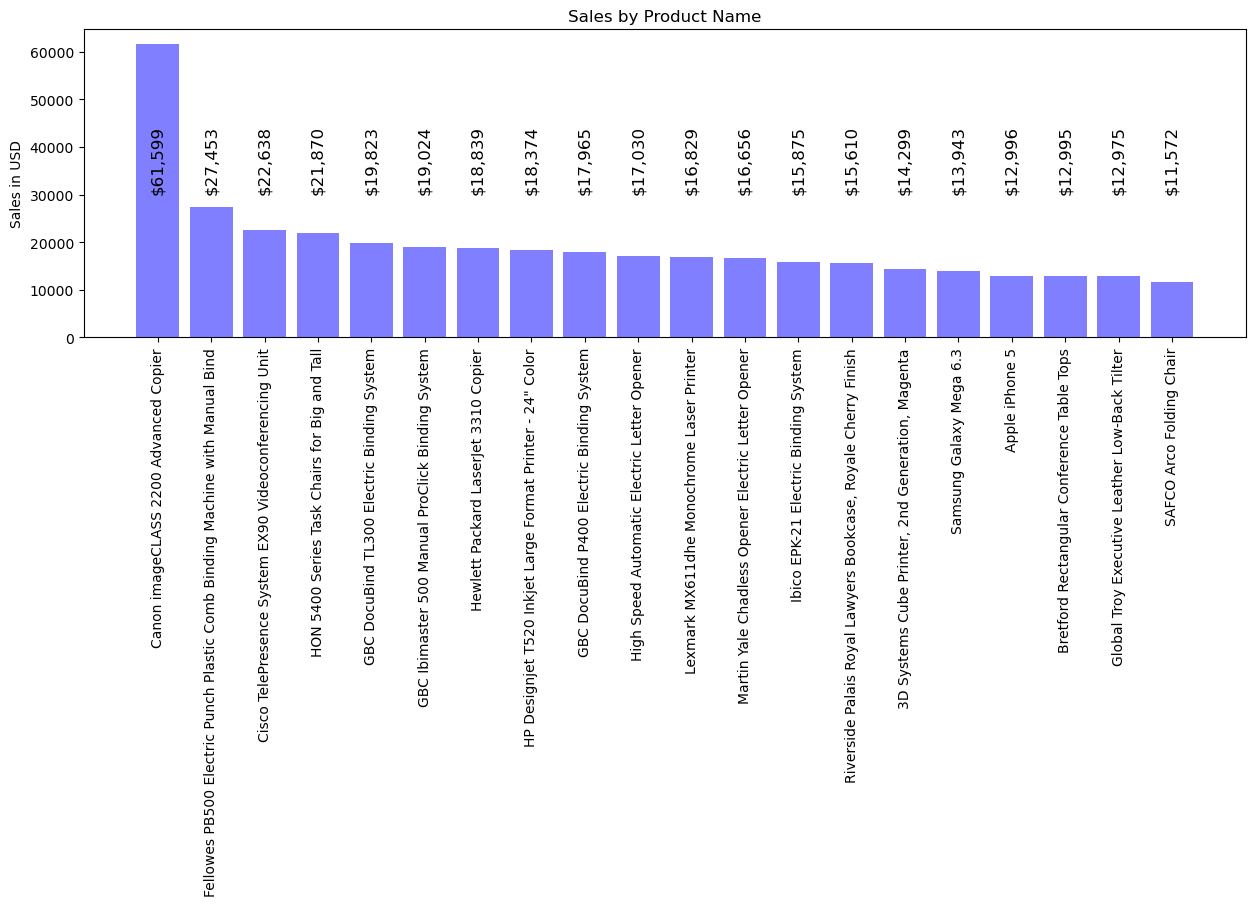

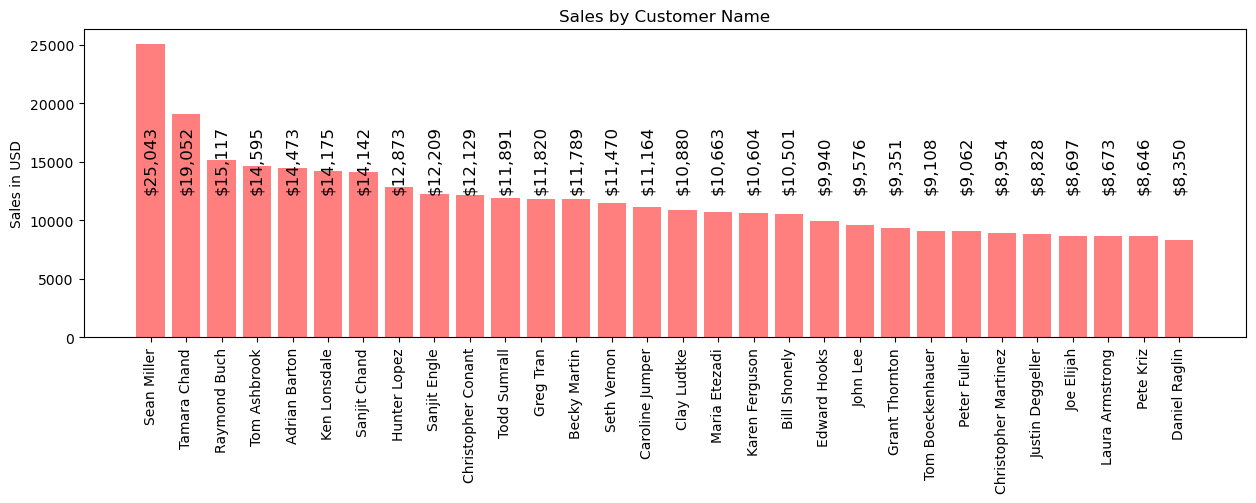

In [38]:
sales_plot_by_group('Product Name', 20, color='blue') # plot sales by product name
sales_plot_by_group('Customer Name',30, color='red')

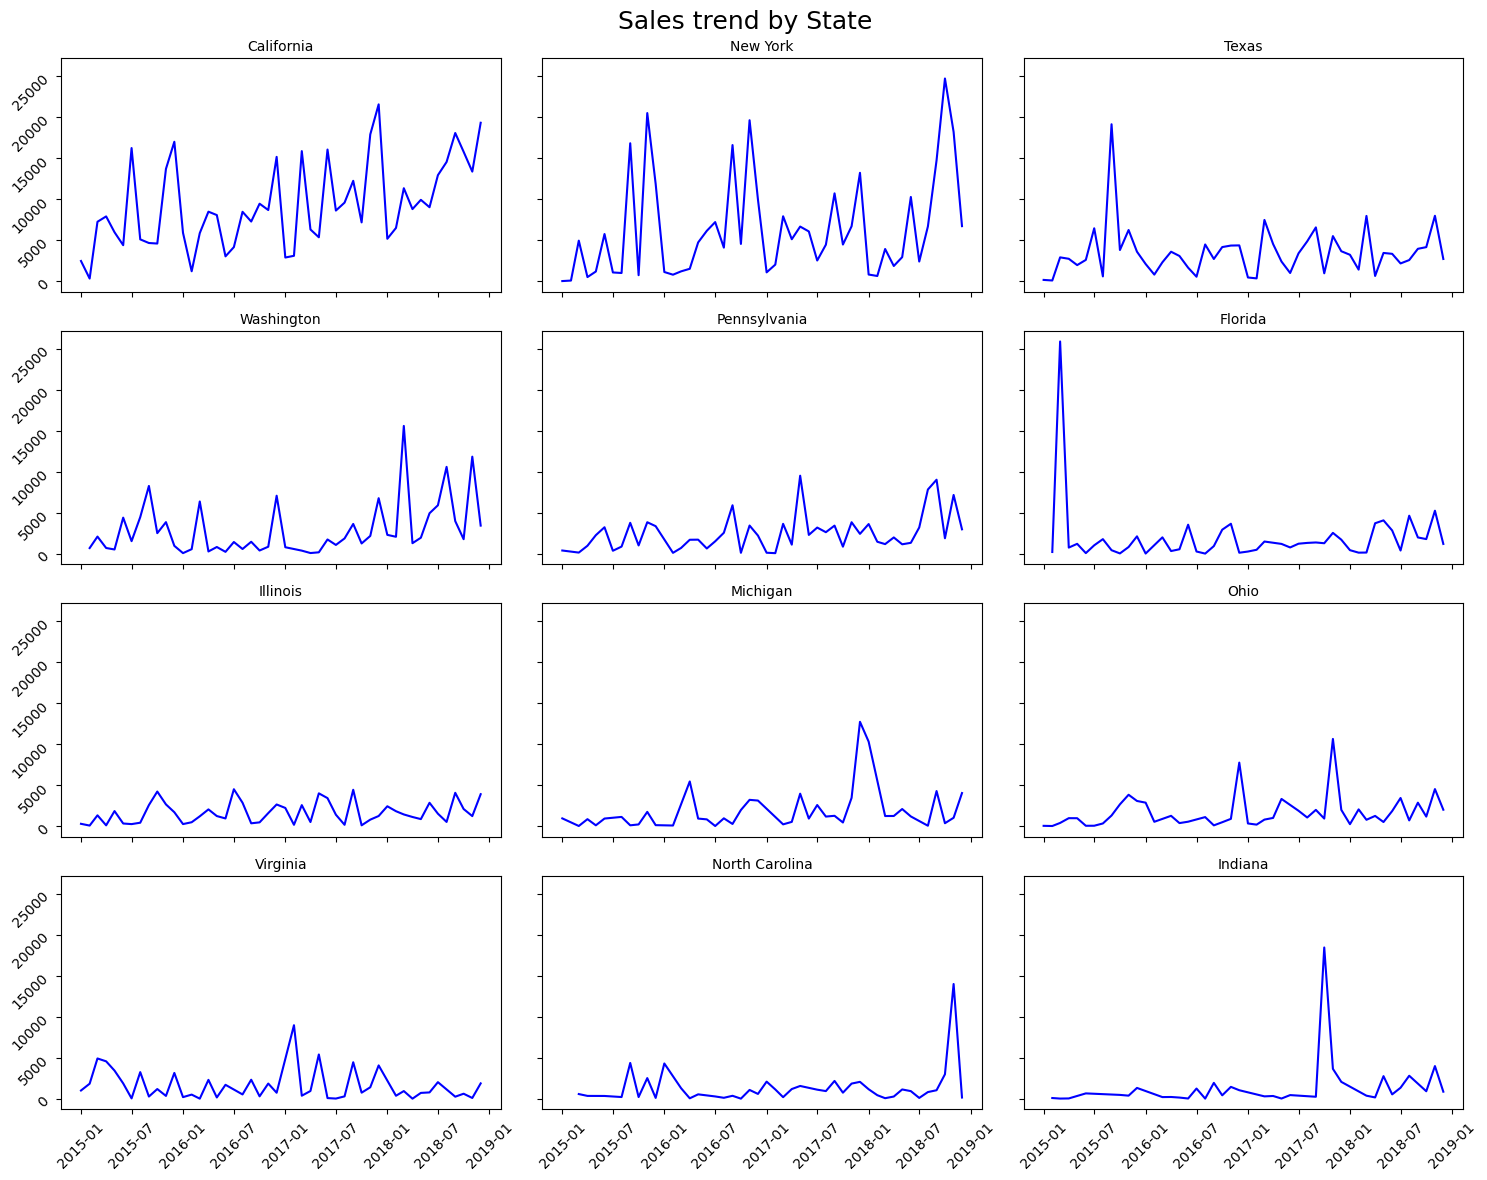

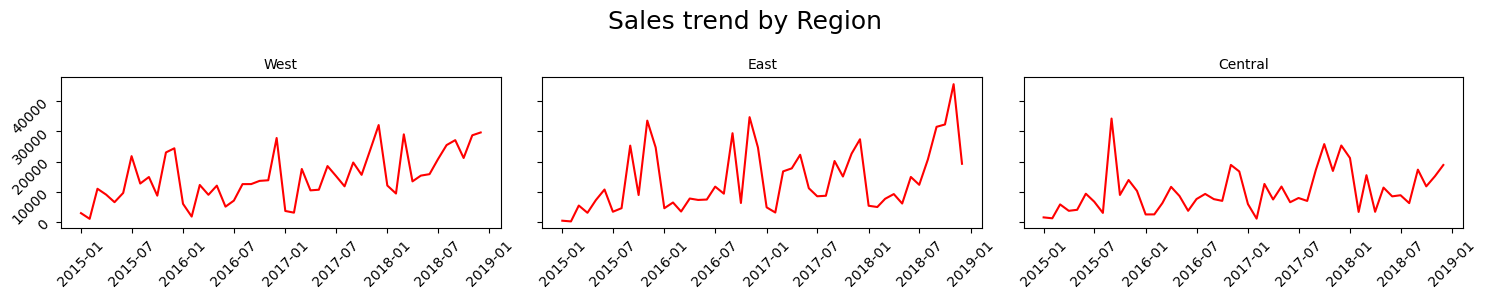

In [39]:
# this function is to plot trend per selected feature
def plot_trend_group(group,size, color='blue'):
    sales_by_group = df.groupby(group)['Sales'].sum() # group sales by group
    sales_by_group.sort_values(ascending= False, inplace=True) # sort values
    sales_by_group.head(size) # select top records
    # subplots with 3 plots per line
    fig, axes = plt.subplots(int(size/3),3, figsize=(15,size), sharex =True, sharey =True)
    fig.suptitle('Sales trend by {}'.format(group), fontsize=18)
    # loop over selected groups in a feature
    for ax,group_name in zip(axes.flat, sales_by_group.index):
        sales_group = df[df[group]==group_name]
        sales_group = sales_group.groupby('month')['Sales'].sum()
        sales_group.index = sales_group.index.to_timestamp()
        ax.tick_params(labelrotation=45)
        ax.set_title(group_name, fontsize = 10)
        ax.plot(sales_group, color=color)
    fig.tight_layout()
plot_trend_group('State',12) # trend for top 12 states
plot_trend_group('Region',3, 'red') # trend per region

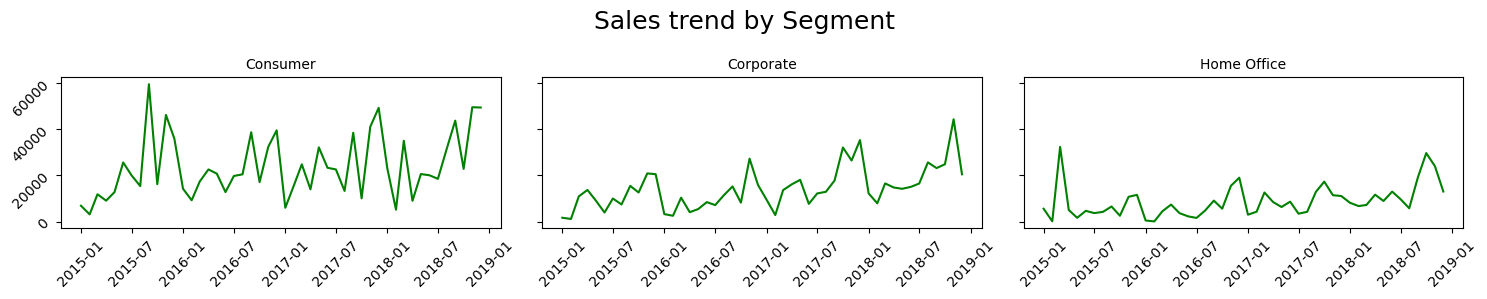

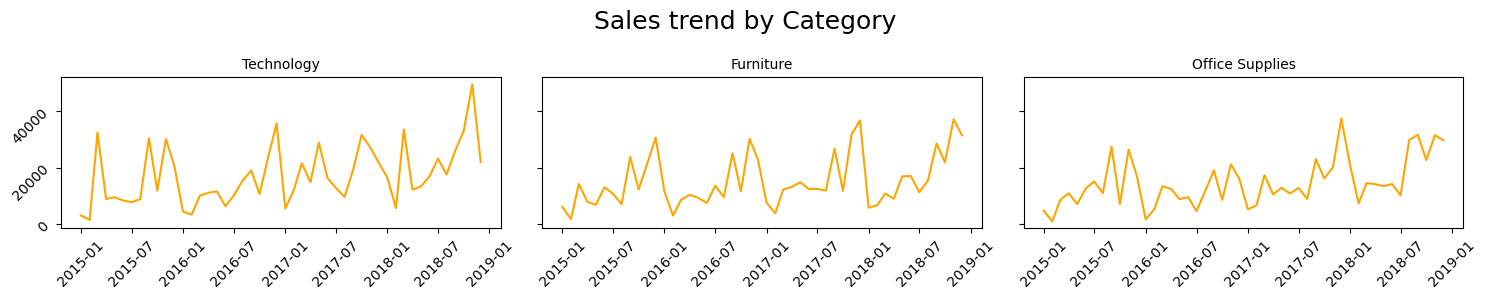

In [40]:

plot_trend_group('Segment',3,'green') # trend per segment
plot_trend_group('Category',3, 'orange') # trend per Category


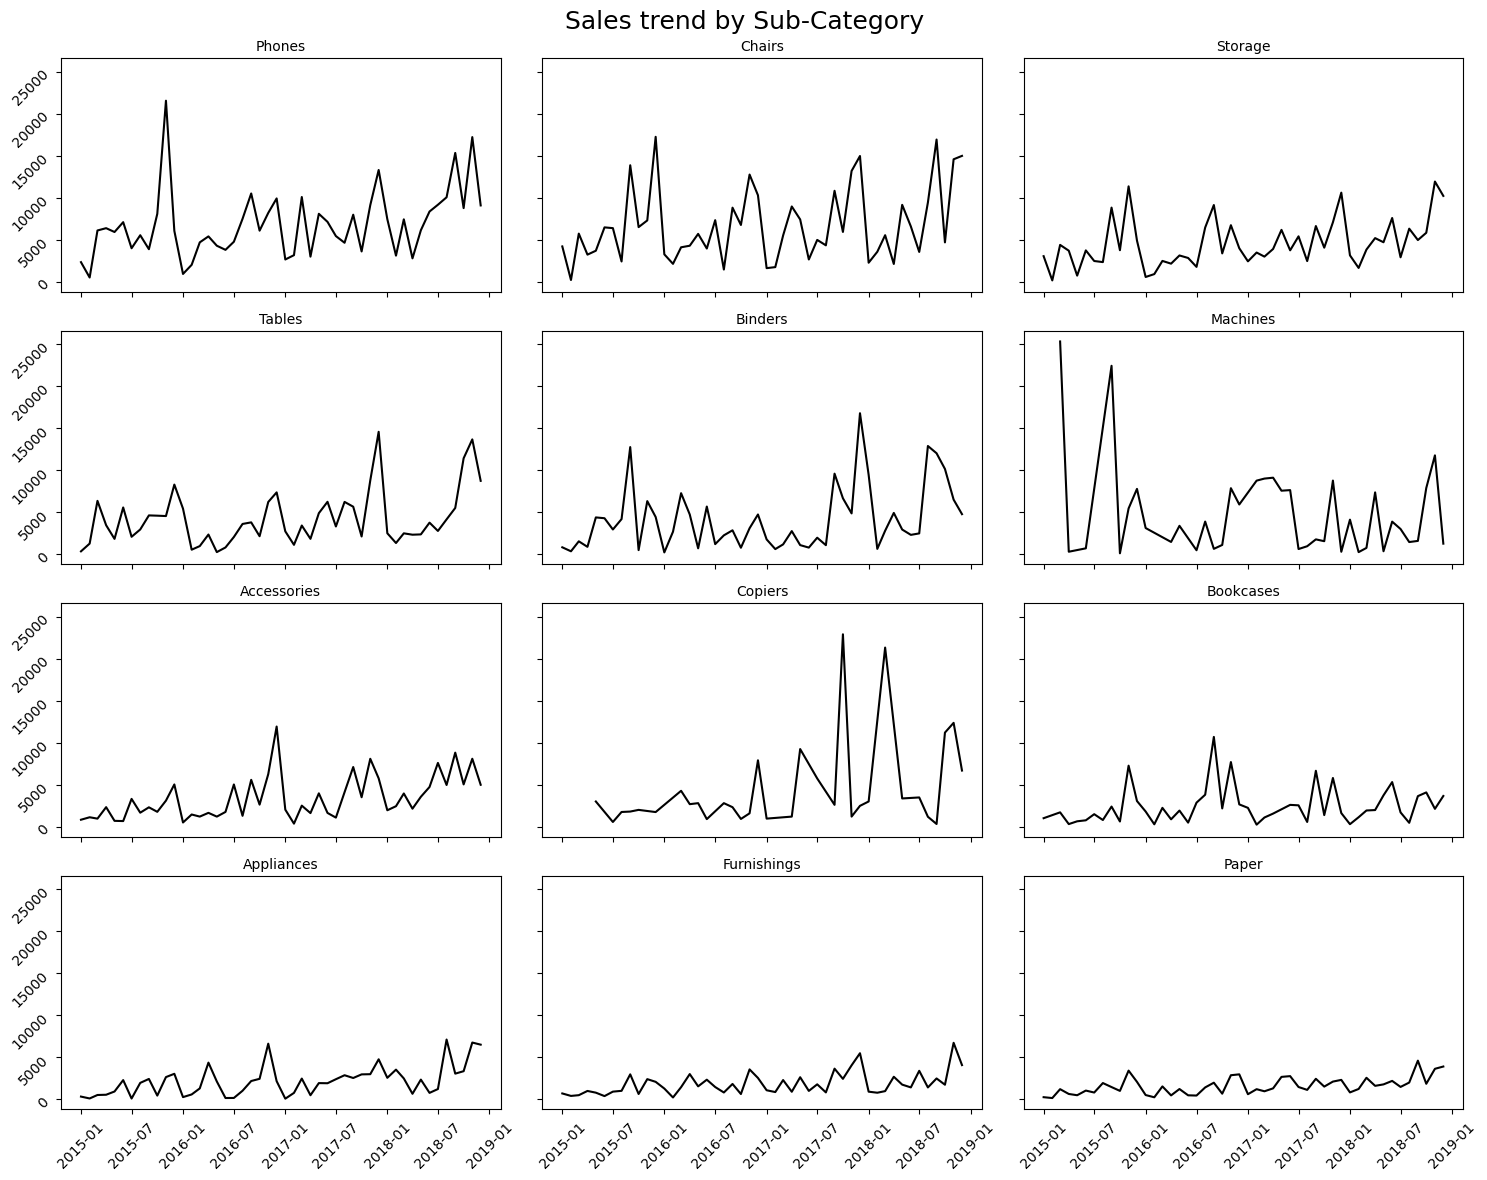

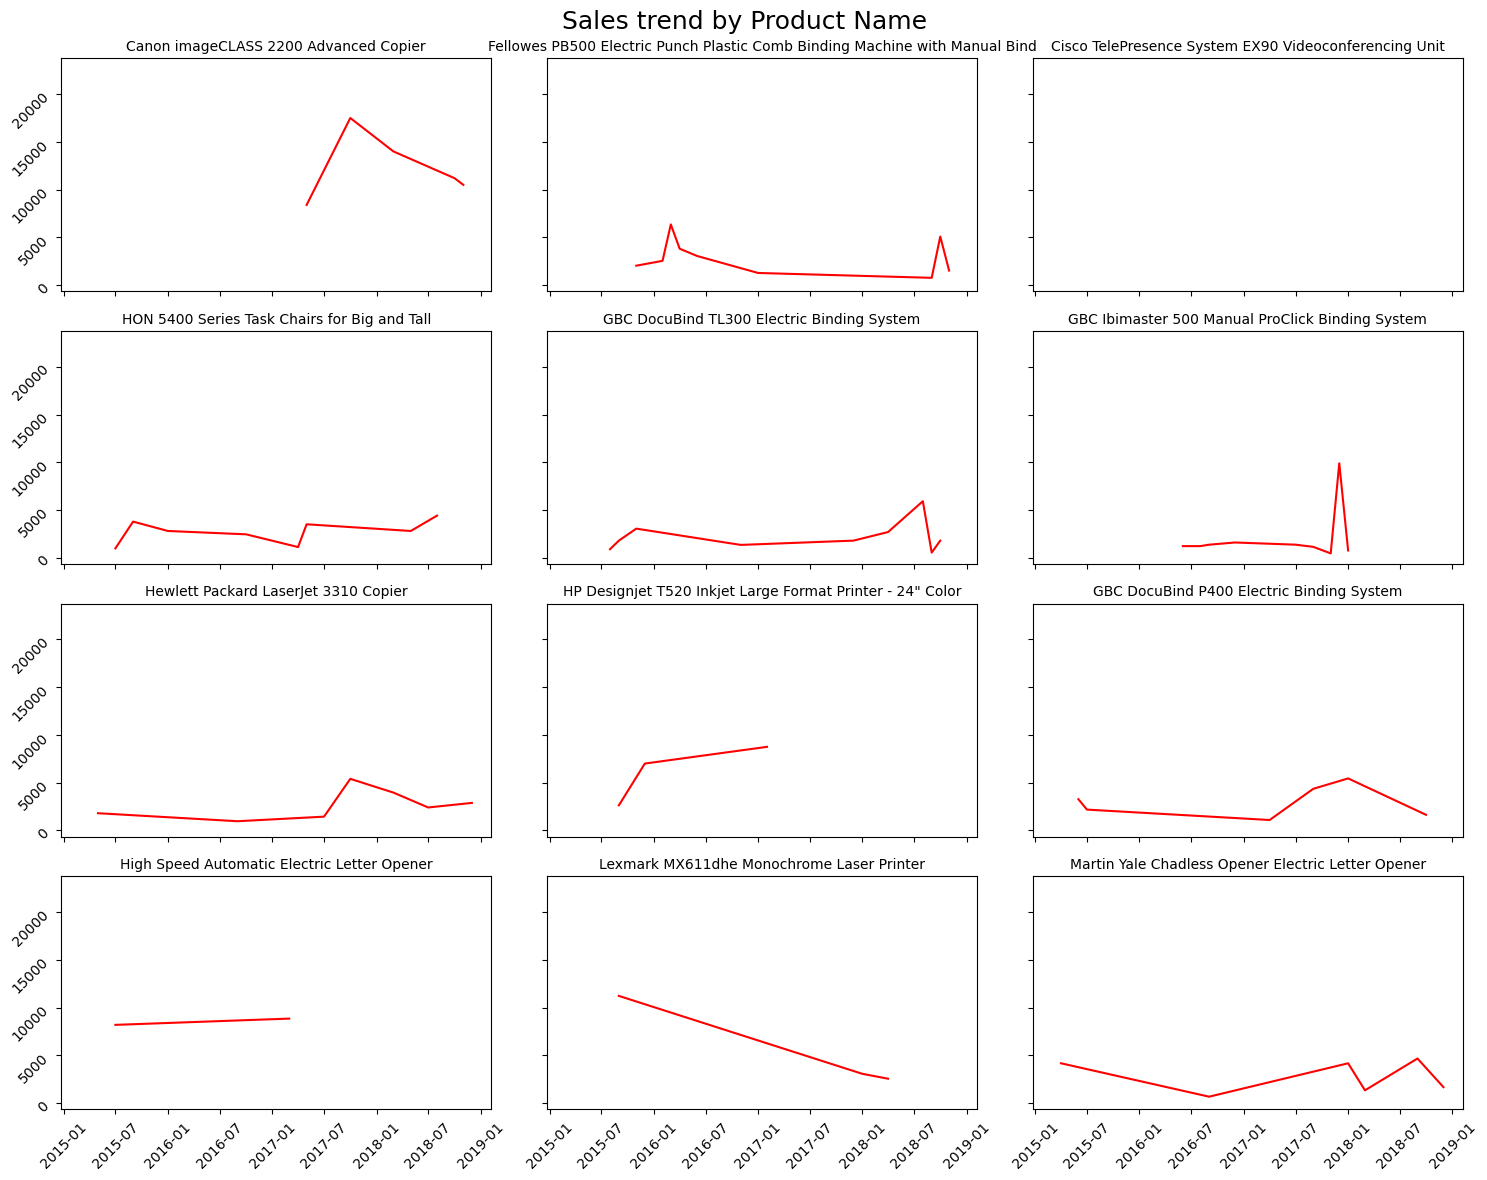

In [41]:
plot_trend_group('Sub-Category',12, 'black') # trend per Sub-Category
plot_trend_group('Product Name',12,'red') # trend per top 12 Product Name

In [42]:
monthly_sales = df.groupby('month')['Sales'].sum()
monthly_sales = pd.DataFrame(monthly_sales)
monthly_sales['time'] = np.arange(len(monthly_sales.index))
monthly_sales.head()

,Sales,time
month,,
2015-01,14205.707,0
2015-02,4519.892,1
2015-03,55205.797,2
2015-04,27906.855,3
2015-05,23644.303,4


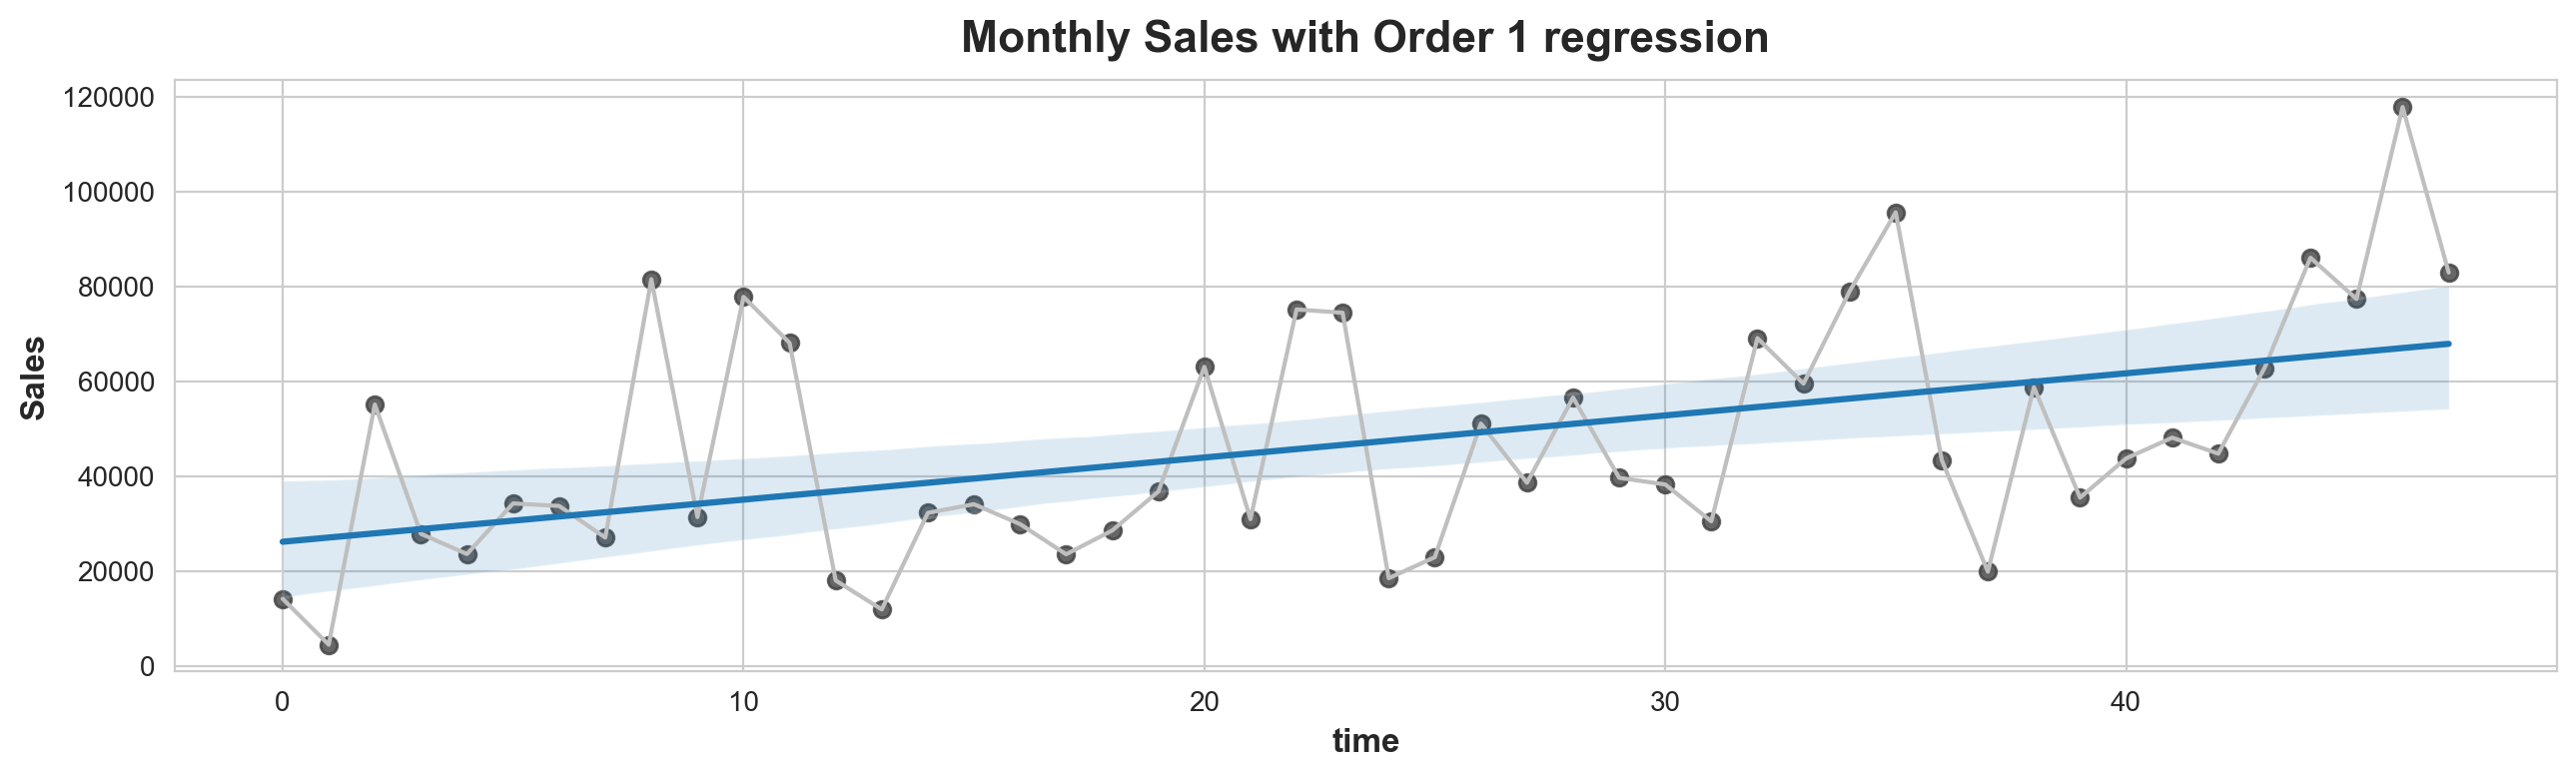

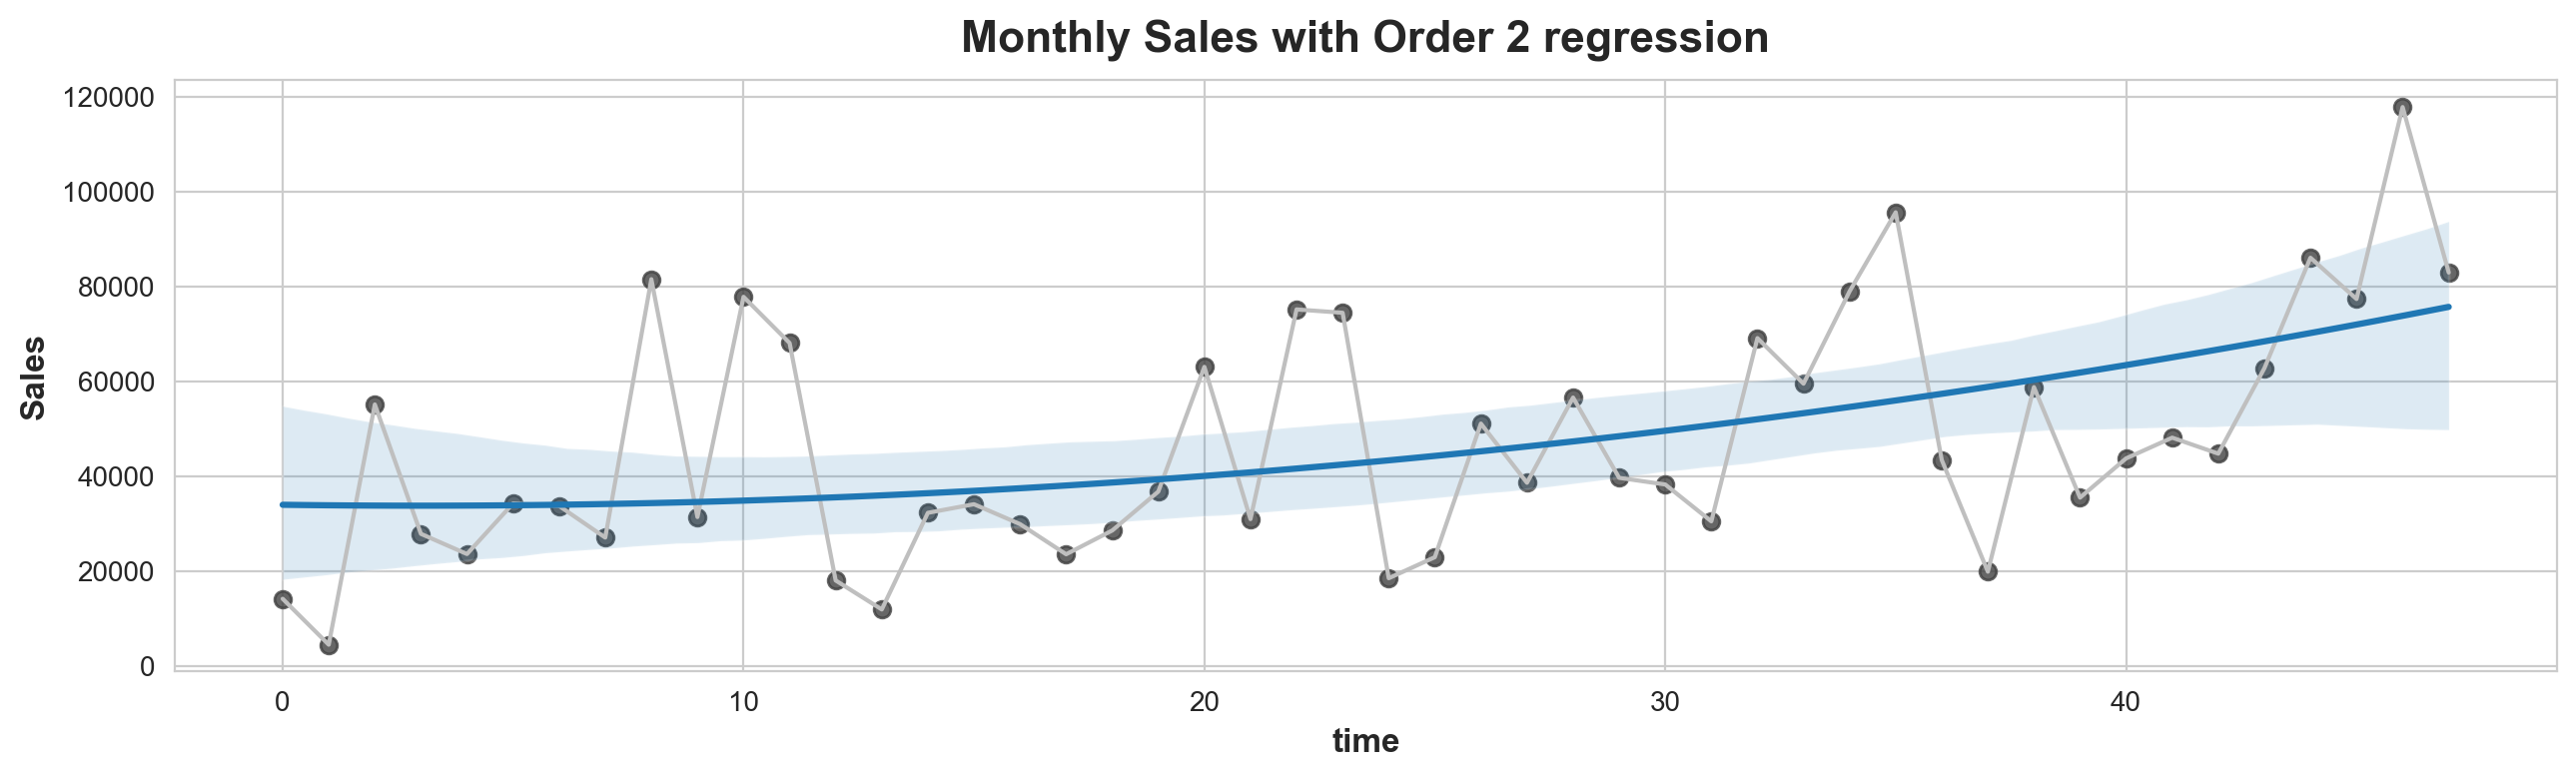

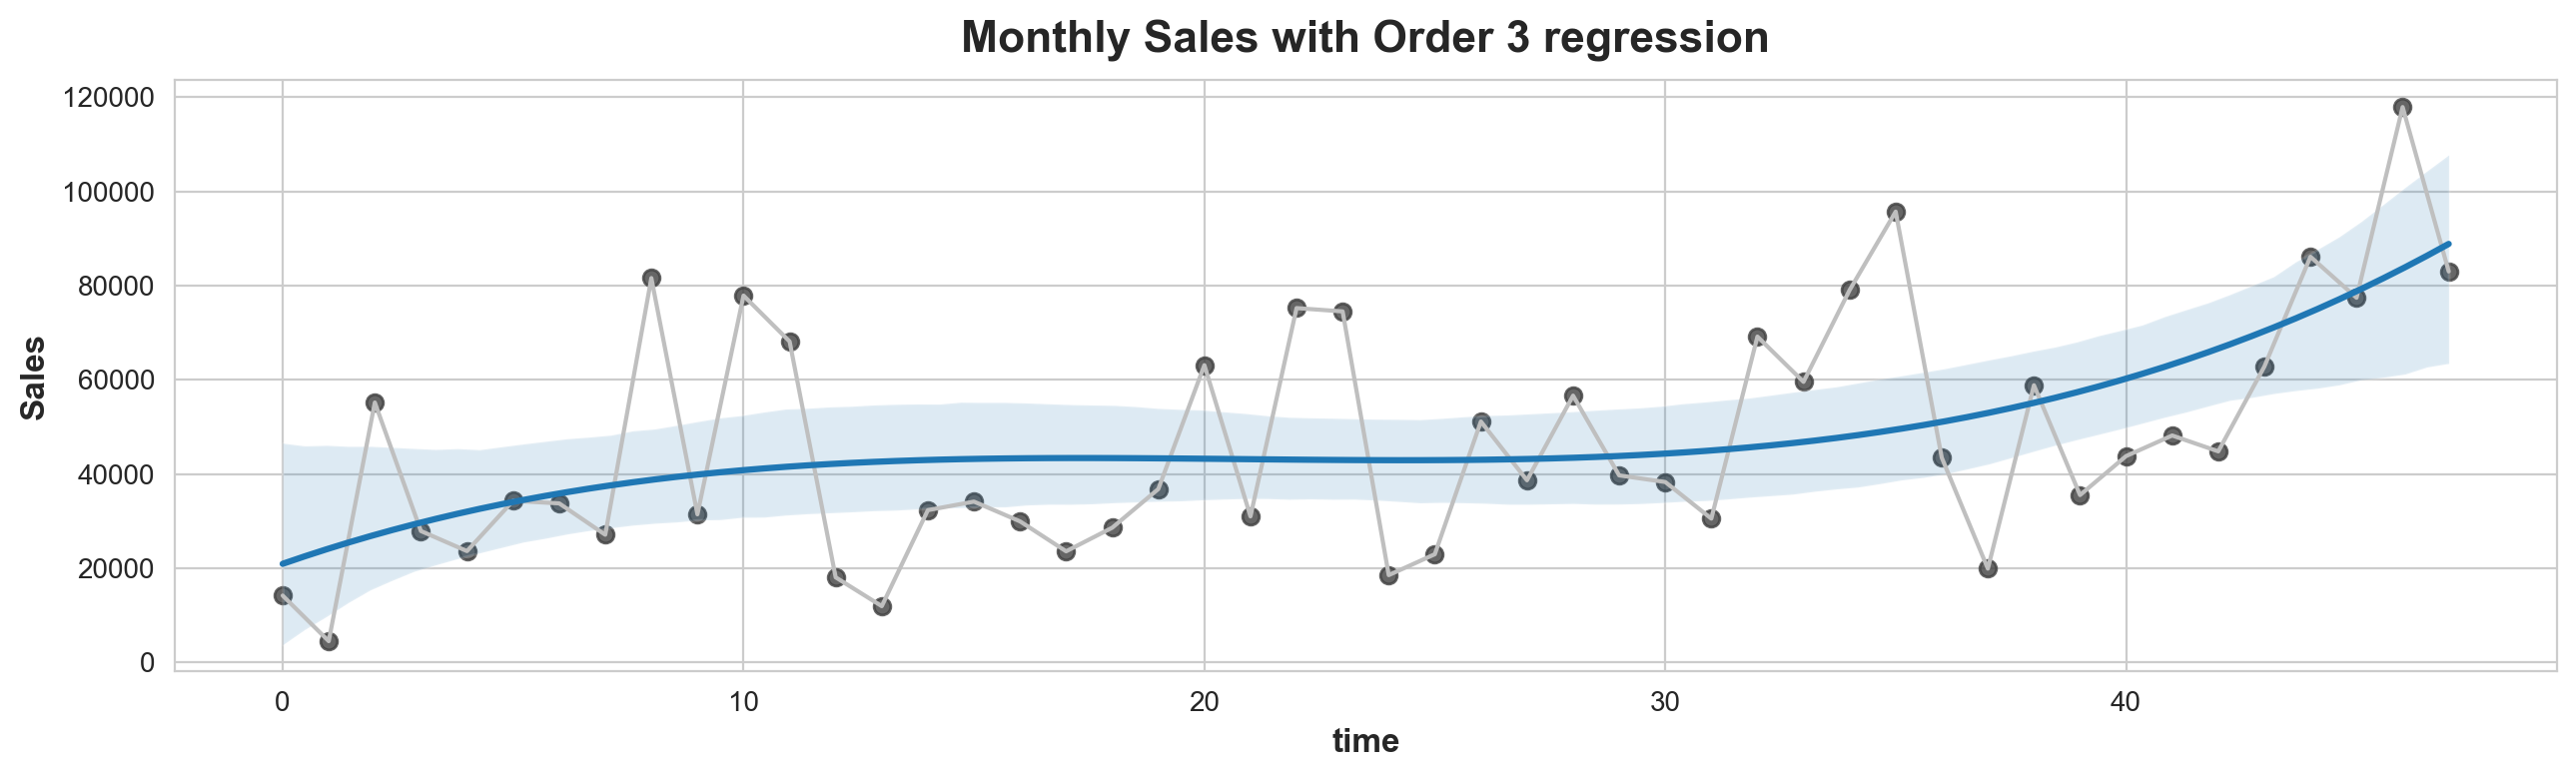

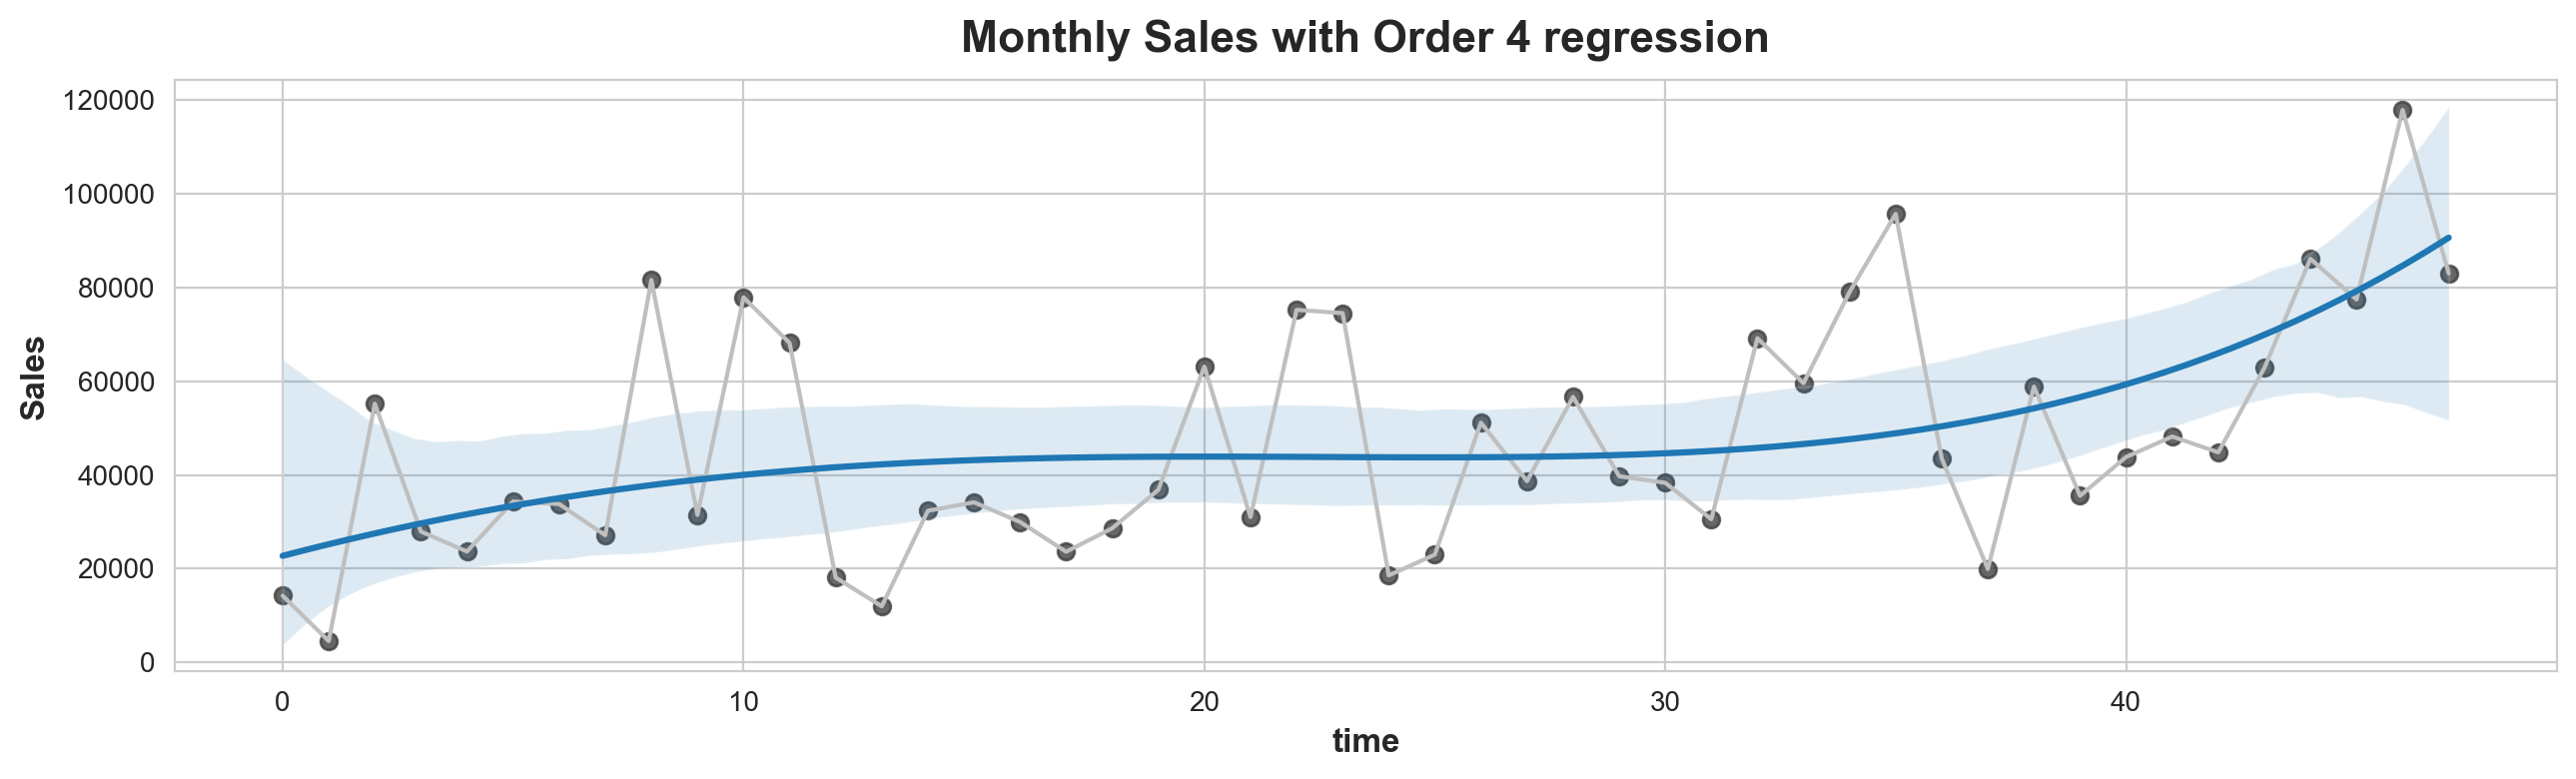

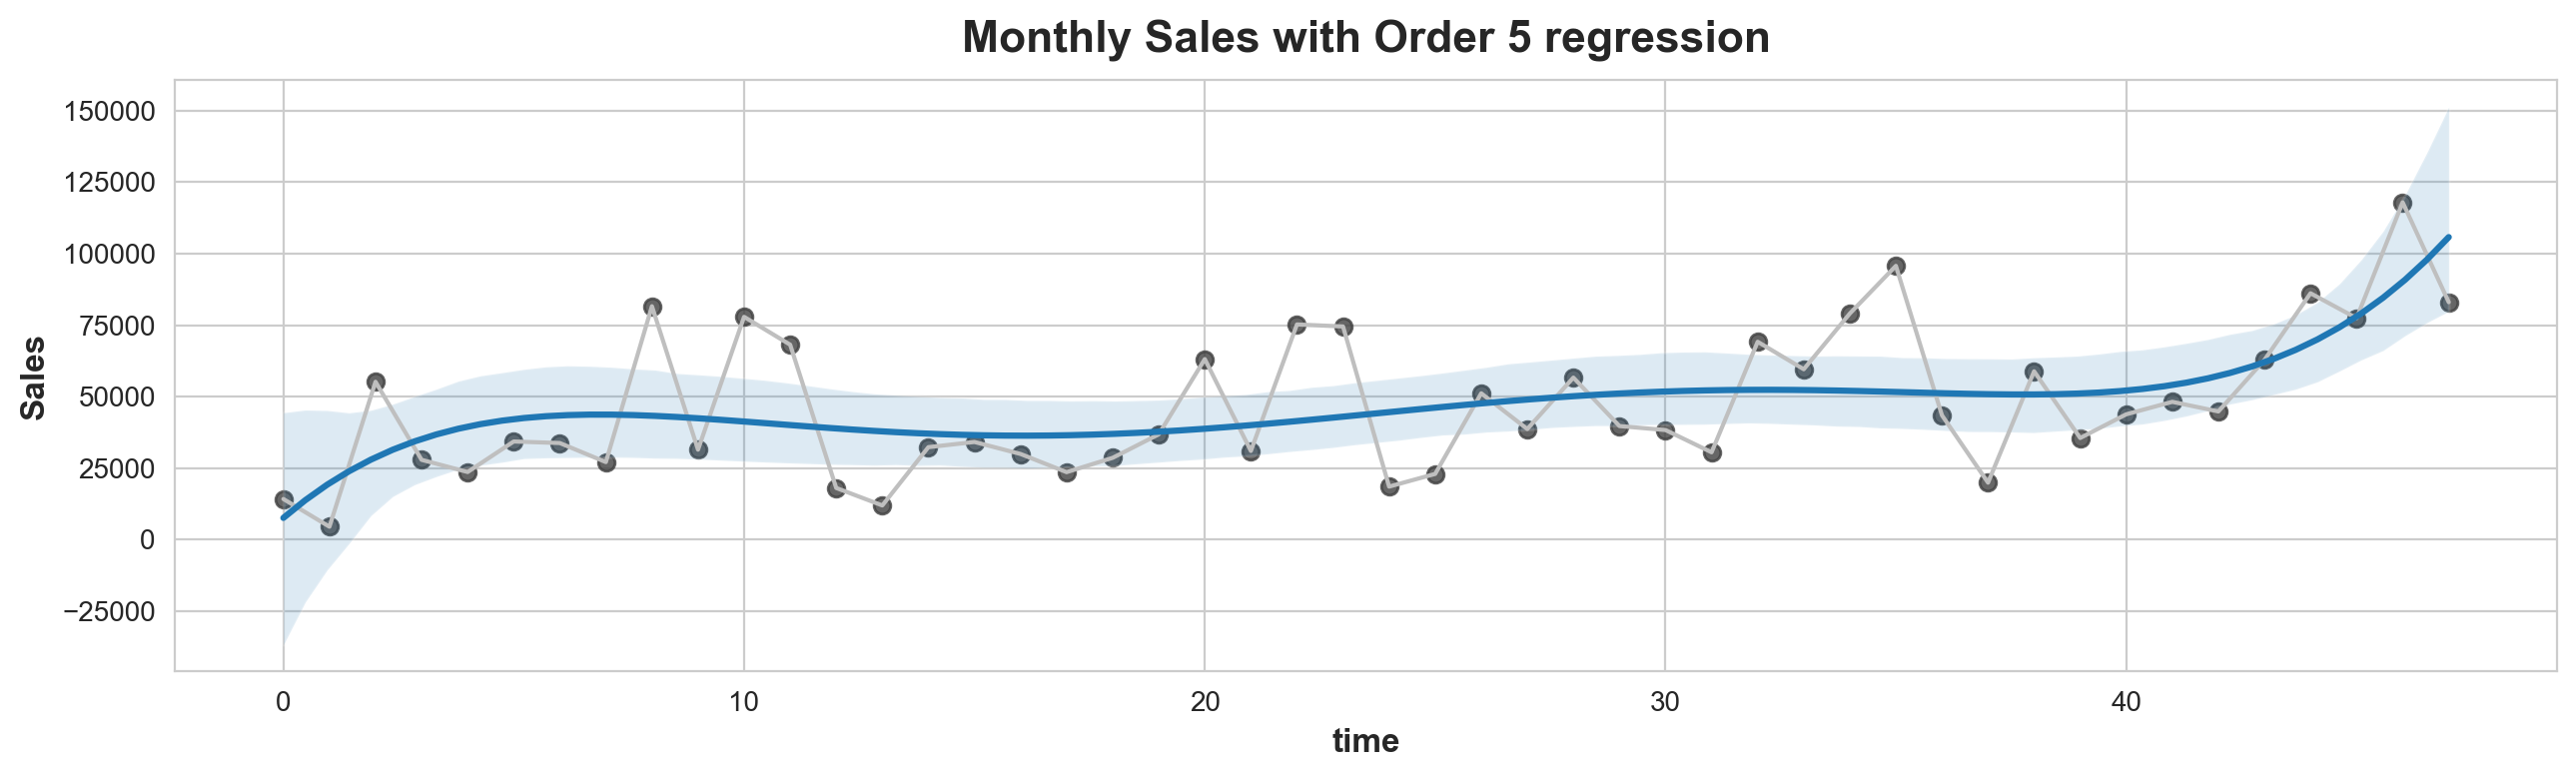

In [43]:
def plot_trend(order=1):
    sns.set_style('whitegrid')
    plt.rc('figure', autolayout = True, figsize= (13,4), titlesize = 18, titleweight = 'bold')
    plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold",titlesize=16,titlepad=10)
    %config InlineBackend.figure_format = 'retina'
    fig, ax = plt.subplots()
    ax.plot(monthly_sales['time'], monthly_sales['Sales'], color='0.75')
    ax = sns.regplot(data=monthly_sales, x='time', y='Sales', scatter_kws=dict(color='0.25'), order=order)
    ax.set_title('Monthly Sales with Order {} regression'.format(order));
# Try regplot between 1 and 5 
for order in range(1,6):
    plot_trend(order)

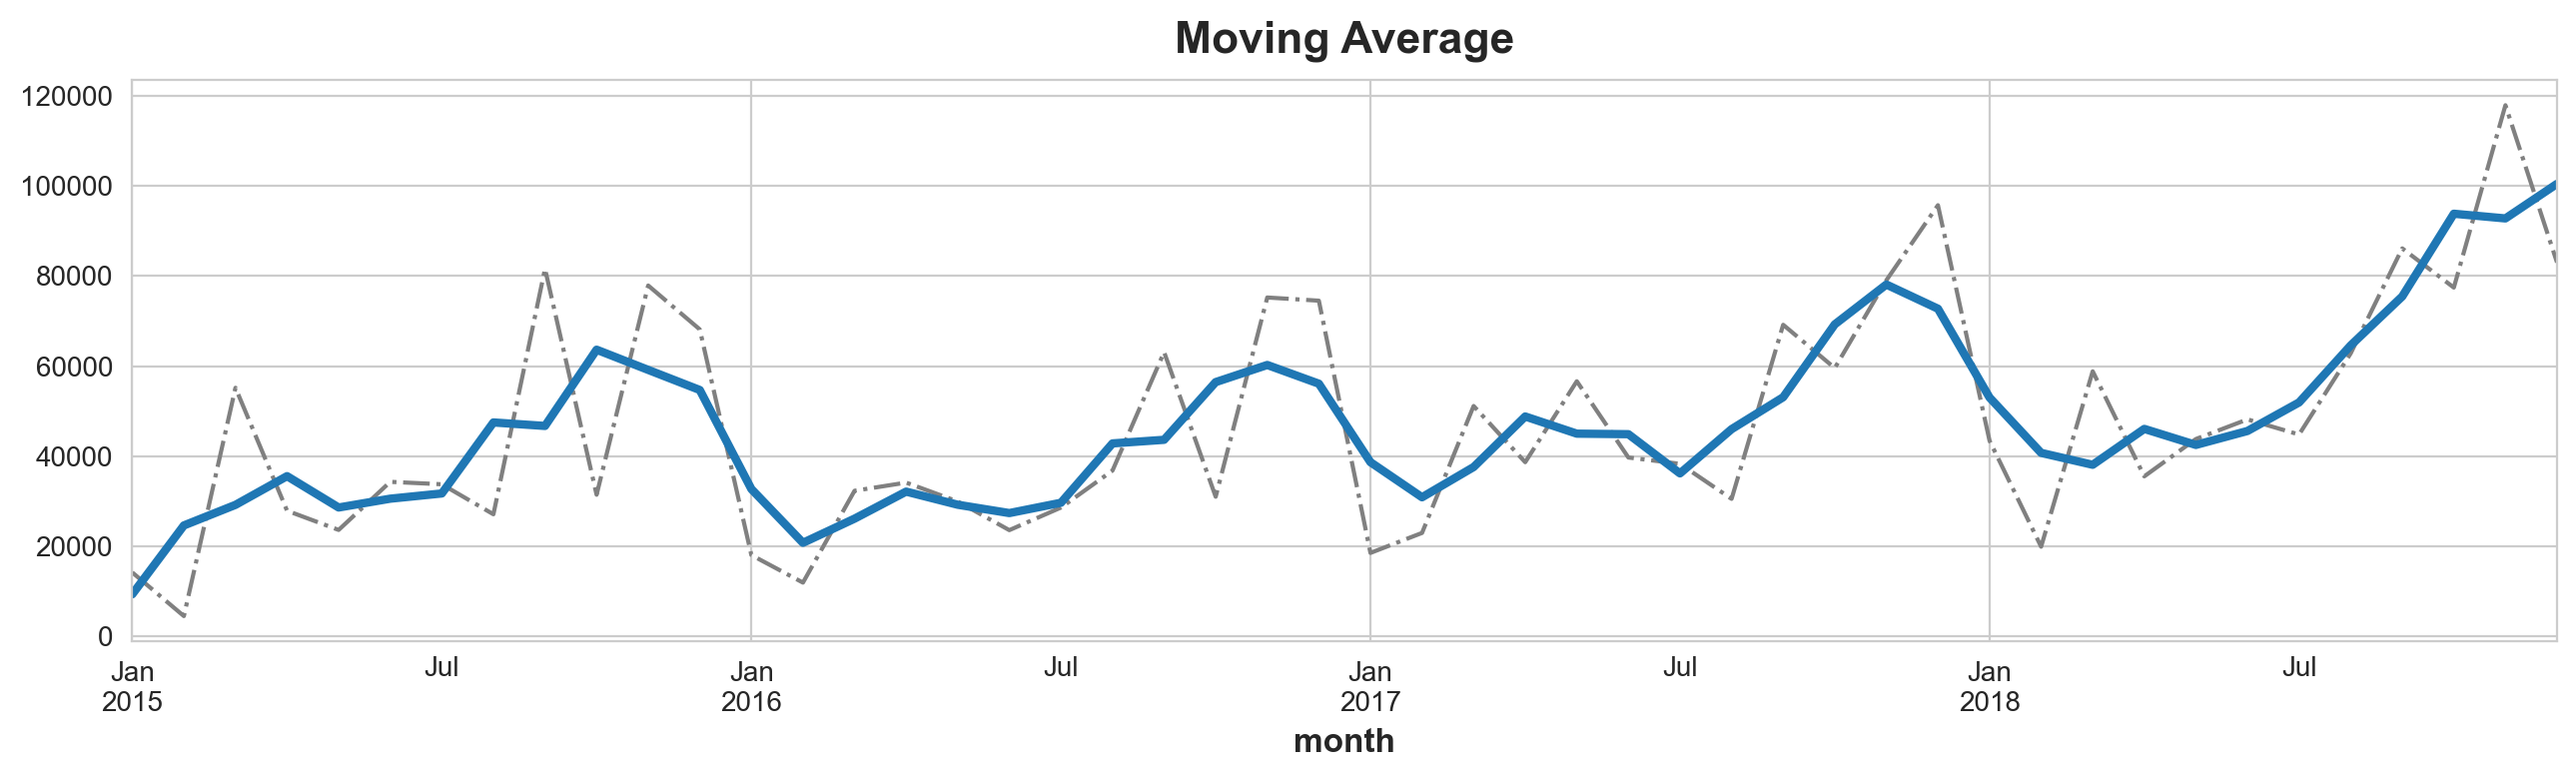

In [44]:
moving_average = monthly_sales['Sales'].rolling(window = 3, center = True, min_periods=1).mean()
moving_average
ax =monthly_sales['Sales'].plot(style="-.", color="0.5")
ax.set_title('Moving Average');
moving_average.plot( ax =ax, linewidth=3);

# 4. Predicting Future Sales with Different Models


In [45]:
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

# Correct frequency string for month-end is 'M'
fourier = CalendarFourier(freq='M', order=4)

# Create the DeterministicProcess with the corrected frequency string
dp = DeterministicProcess(
    index=monthly_sales.index,  # dates from the training data
    constant=True,              # dummy feature for the bias (y_intercept)
    order=2,                    # the time dummy (trend)
    additional_terms=[fourier],
    seasonal=True,
    drop=True,
)

# Generate in-sample features
X = dp.in_sample()
print(X.head(13))


         const  trend  trend_squared  s(2,12)  s(3,12)  s(4,12)  s(5,12)  \
month                                                                      
2015-01    1.0    1.0            1.0      0.0      0.0      0.0      0.0   
2015-02    1.0    2.0            4.0      1.0      0.0      0.0      0.0   
2015-03    1.0    3.0            9.0      0.0      1.0      0.0      0.0   
2015-04    1.0    4.0           16.0      0.0      0.0      1.0      0.0   
2015-05    1.0    5.0           25.0      0.0      0.0      0.0      1.0   
2015-06    1.0    6.0           36.0      0.0      0.0      0.0      0.0   
2015-07    1.0    7.0           49.0      0.0      0.0      0.0      0.0   
2015-08    1.0    8.0           64.0      0.0      0.0      0.0      0.0   
2015-09    1.0    9.0           81.0      0.0      0.0      0.0      0.0   
2015-10    1.0   10.0          100.0      0.0      0.0      0.0      0.0   
2015-11    1.0   11.0          121.0      0.0      0.0      0.0      0.0   
2015-12    1

In [46]:
# split the data to train and test. Use year 2018 for test data.
y = monthly_sales['Sales']
X_train= X.loc[:'2017-12']
X_test = X.loc['2018-01':]
y_train = y.loc[:'2017-12']
y_test = y.loc['2018-01':]

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
# pred1 is fitted on X_train, the same data we used for training. 
y_pred1 = pd.Series(model.predict(X_train), index = X_train.index)
# pred2 is fitted on X_test, which is the year 2018
y_pred2 = pd.Series(model.predict(X_test), index = X_test.index)
# additionally we can tak a look at prediction for year 2019
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)


# Linear Regression

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_pinball_loss
from sklearn.metrics import d2_tweedie_score

list_metrics = []
formatl = ['{:<20} ','| {:^6.2f} ','| {:^6.0f} ','| {:^12,.0f}',' | {:^4.2f}',' | {:^6.2f}',' | {:^8.0f}',' | {:^6.0f}',' | {:^6.2f}',' | {:^6.0f}',
           ' | {:^4.2f} |',' {:^4.2f} ']

def evaluate_model(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    msle = mean_squared_log_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    medae = median_absolute_error(y_true, y_pred)
    me = max_error(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    mpl = mean_pinball_loss(y_true, y_pred)
    d2t = d2_tweedie_score(y_true, y_pred)
    # d2p = d2_pinball_score(y_true, y_pred)  # Removed this line
    
    # Removed d2p from list_metrics
    list_metrics.append([model_name, r2, mae, mse, msle, mape, medae, me, evs, mpl, d2t])
    
    print('{:^20} | {:^6} | {:^6} | {:^12} | {:^4} | {:^6} | {:^8} | {:^6} | {:^6} | {:^6} | {:^4} '.format(
         'Model','R2','MAE','MSE','MSLE','MAPE','MEDAE','ME','EVS','MPL','D2T'))
    
    for metrics in list_metrics:
        for format_, value in zip(formatl, metrics):
            print(format_.format(value), end="")
        print()

# Example usage:
# evaluate_model('Model_Name', y_true, y_pred)


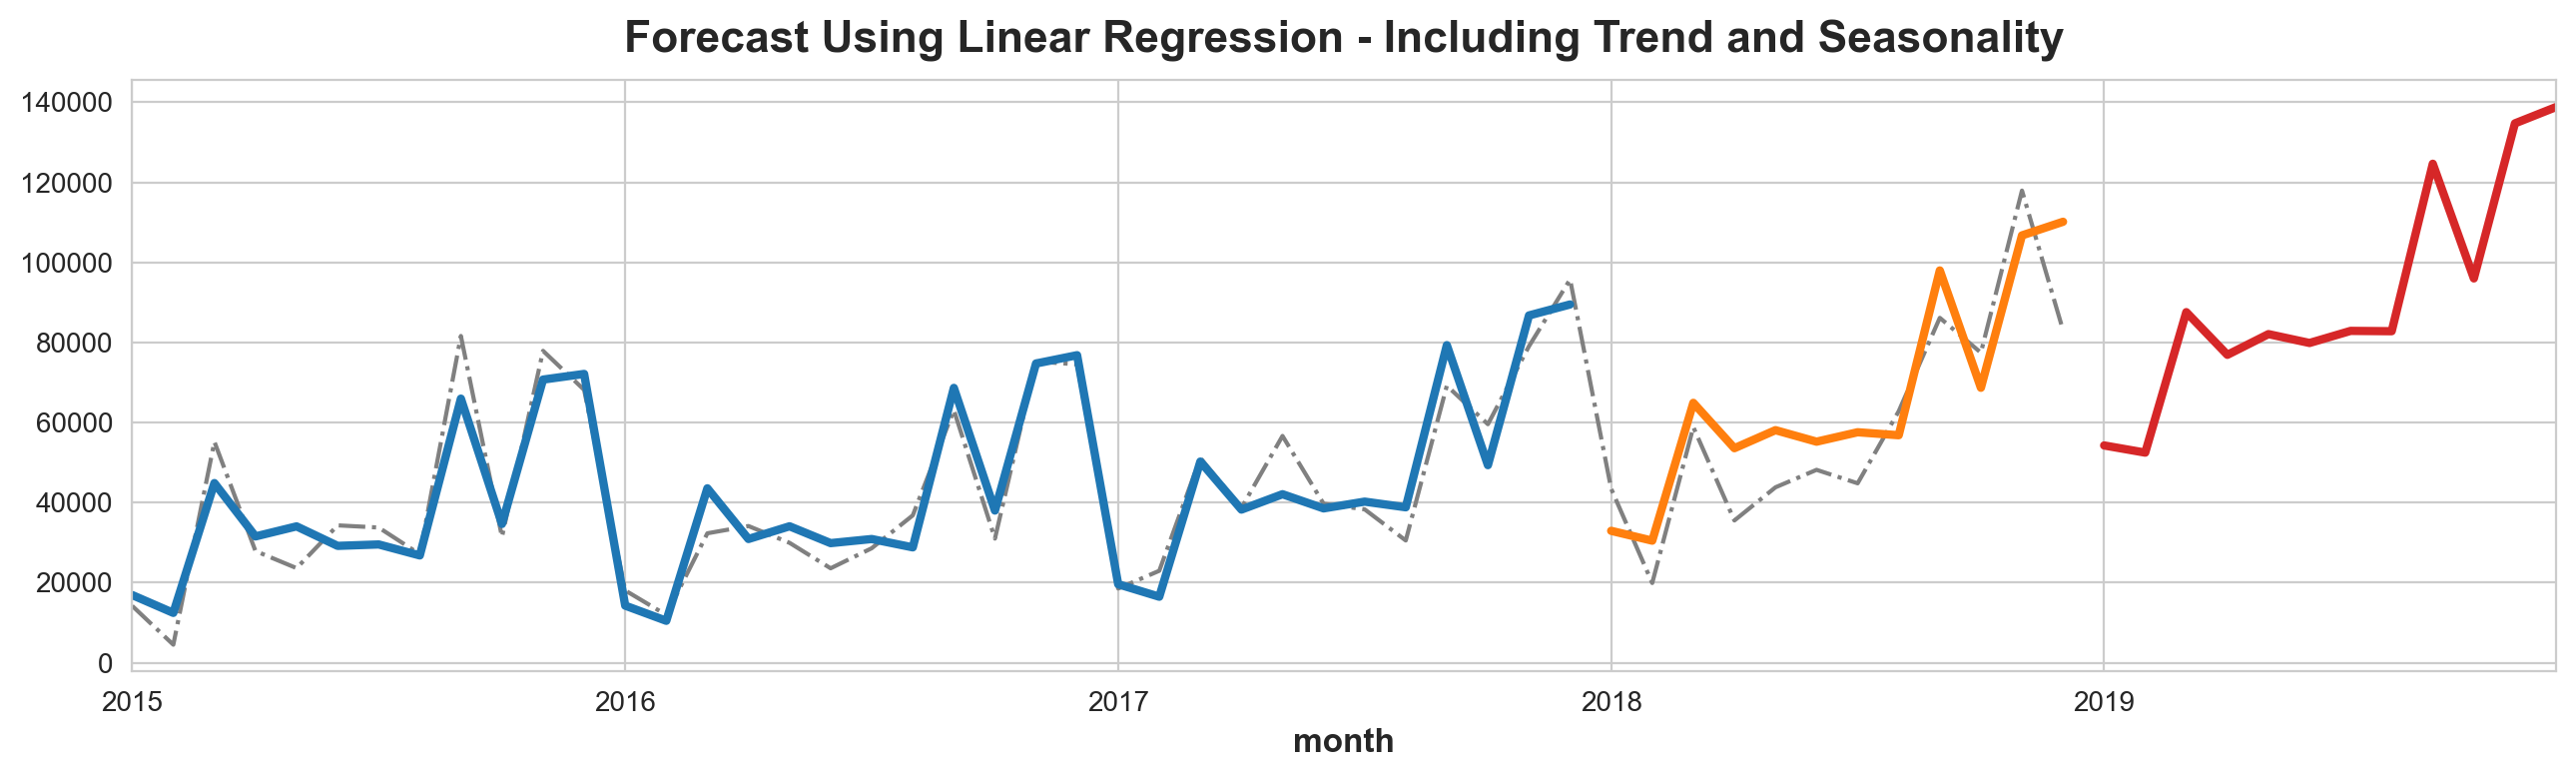

In [48]:
# Fit the model and predict y_forecast
model.fit(X_train, y_train)
y_pred1 = pd.Series(model.predict(X_train), index=X_train.index)
y_pred2 = pd.Series(model.predict(X_test), index=X_test.index)
y_forecast = pd.Series(model.predict(dp.out_of_sample(steps=12)), index=dp.out_of_sample(steps=12).index)

# Plotting with all predictions
ax = monthly_sales['Sales'].plot(style="-.", color="0.5", title="Forecast Using Linear Regression - Including Trend and Seasonality")
ax = y_pred1.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred2.plot(ax=ax, linewidth=3)
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')


In [49]:
# r squared is used to measure how far is prediction data from actual train and test data
from sklearn.metrics import r2_score
r_squared = r2_score ( y_train,y_pred1)
print('R2 squared of Prediction for train data: ', r_squared)
print('R2 squared of Prediction for test data (2018): ' ,r2_score (y_test, y_pred2))
evaluate_model('Linear Regression', y_test, y_pred2)

R2 squared of Prediction for train data:  0.9105004682072054
R2 squared of Prediction for test data (2018):  0.7354848558367308
       Model         |   R2   |  MAE   |     MSE      | MSLE |  MAPE  |  MEDAE   |   ME   |  EVS   |  MPL   | D2T  
Linear Regression    |  0.74  | 12015  | 176,200,603  | 0.06 |  0.24  |  10889   | 27115  |  0.79  |  6008  | 0.74 |


In [50]:
X_train= X.loc[:'2017-12']
X_test = X.loc['2018-01':]
y_train = y.loc[:'2017-12']
y_test = y.loc['2018-01':]
from sklearn.ensemble import AdaBoostRegressor
# from sklearn.linear_model import Ridge, Lasso, ElasticNet 
ada = AdaBoostRegressor(n_estimators = 40 , estimator = LinearRegression(), loss='square', learning_rate = 0.5, random_state =21)
ada.fit(X_train,y_train)

y_pred1 = pd.Series(ada.predict(X_train), index = X_train.index)
y_pred2 = pd.Series(ada.predict(X_test), index = X_test.index)
y_forecast = pd.Series(ada.predict(dp.out_of_sample(steps = 12)), index = dp.out_of_sample(steps = 12).index)

r_squared_fit = r2_score(y_train,y_pred1)
r_squared_test = r2_score(y_test,y_pred2)

print(r_squared_fit)
print(r_squared_test)
evaluate_model('Linear & AdaBoost', y_test, y_pred2)

0.9303337615984233
0.7712840424111637
       Model         |   R2   |  MAE   |     MSE      | MSLE |  MAPE  |  MEDAE   |   ME   |  EVS   |  MPL   | D2T  
Linear Regression    |  0.74  | 12015  | 176,200,603  | 0.06 |  0.24  |  10889   | 27115  |  0.79  |  6008  | 0.74 |
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808  | 0.04 |  0.18  |   9684   | 22623  |  0.77  |  5225  | 0.77 |


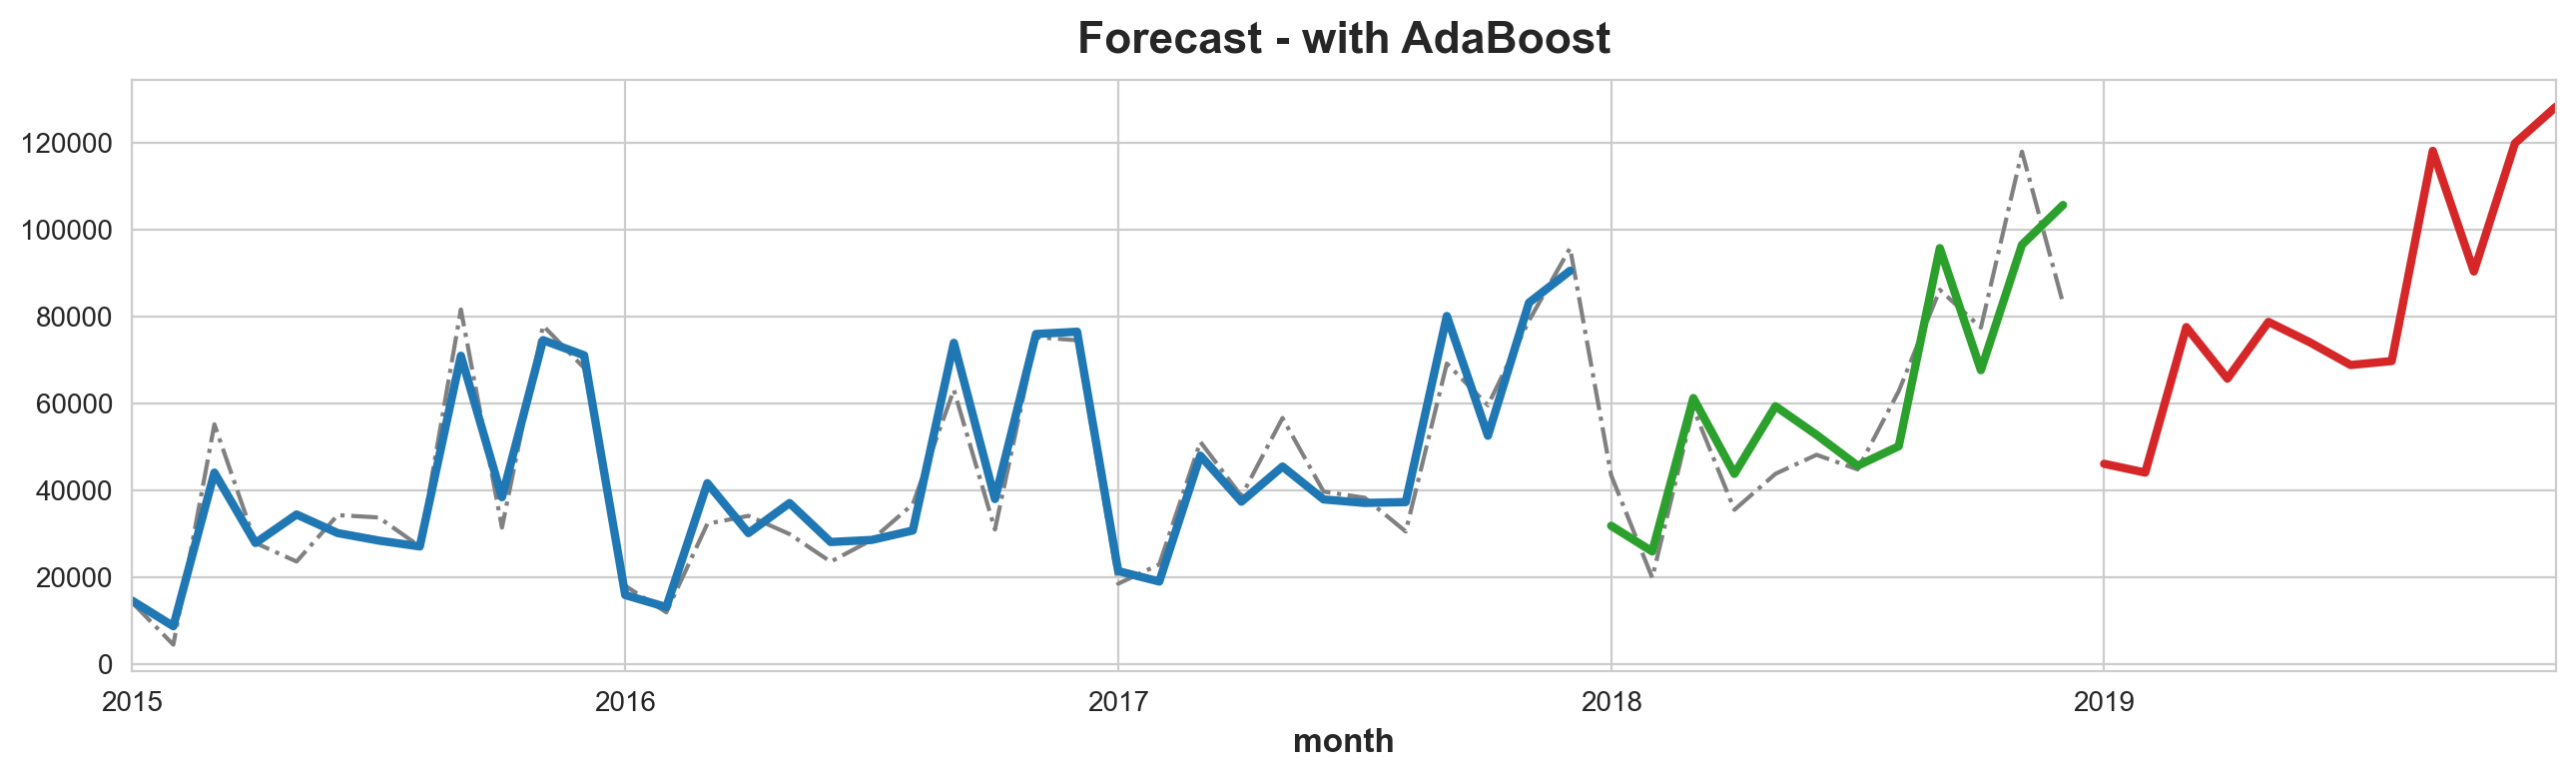

In [51]:
ax = y.plot(style="-.", color="0.5", title="Forecast - with AdaBoost")
ax = y_pred1.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred2.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
ax = y_forecast.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')

# Random Forest Regression 

0.9424384344301477
0.327731152402305
       Model         |   R2   |  MAE   |     MSE      | MSLE |  MAPE  |  MEDAE   |   ME   |  EVS   |  MPL   | D2T  
Linear Regression    |  0.74  | 12015  | 176,200,603  | 0.06 |  0.24  |  10889   | 27115  |  0.79  |  6008  | 0.74 |
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808  | 0.04 |  0.18  |   9684   | 22623  |  0.77  |  5225  | 0.77 |
Random Forest        |  0.16  | 19888  | 562,741,726  | 0.22 |  0.50  |  20286   | 45029  |  0.31  |  9944  | 0.16 |
Gradient Boosting    |  0.27  | 19735  | 486,426,774  | 0.19 |  0.46  |  16728   | 36422  |  0.41  |  9867  | 0.27 |
SVM Regression       | -1.01  | 28319  | 1,338,610,859 | 0.42 |  0.42  |  19471   | 83699  | -0.00  | 14159  | -1.01 |
Random Forest        |  0.33  | 17574  | 447,816,235  | 0.18 |  0.43  |  15467   | 38481  |  0.41  |  8787  | 0.33 |


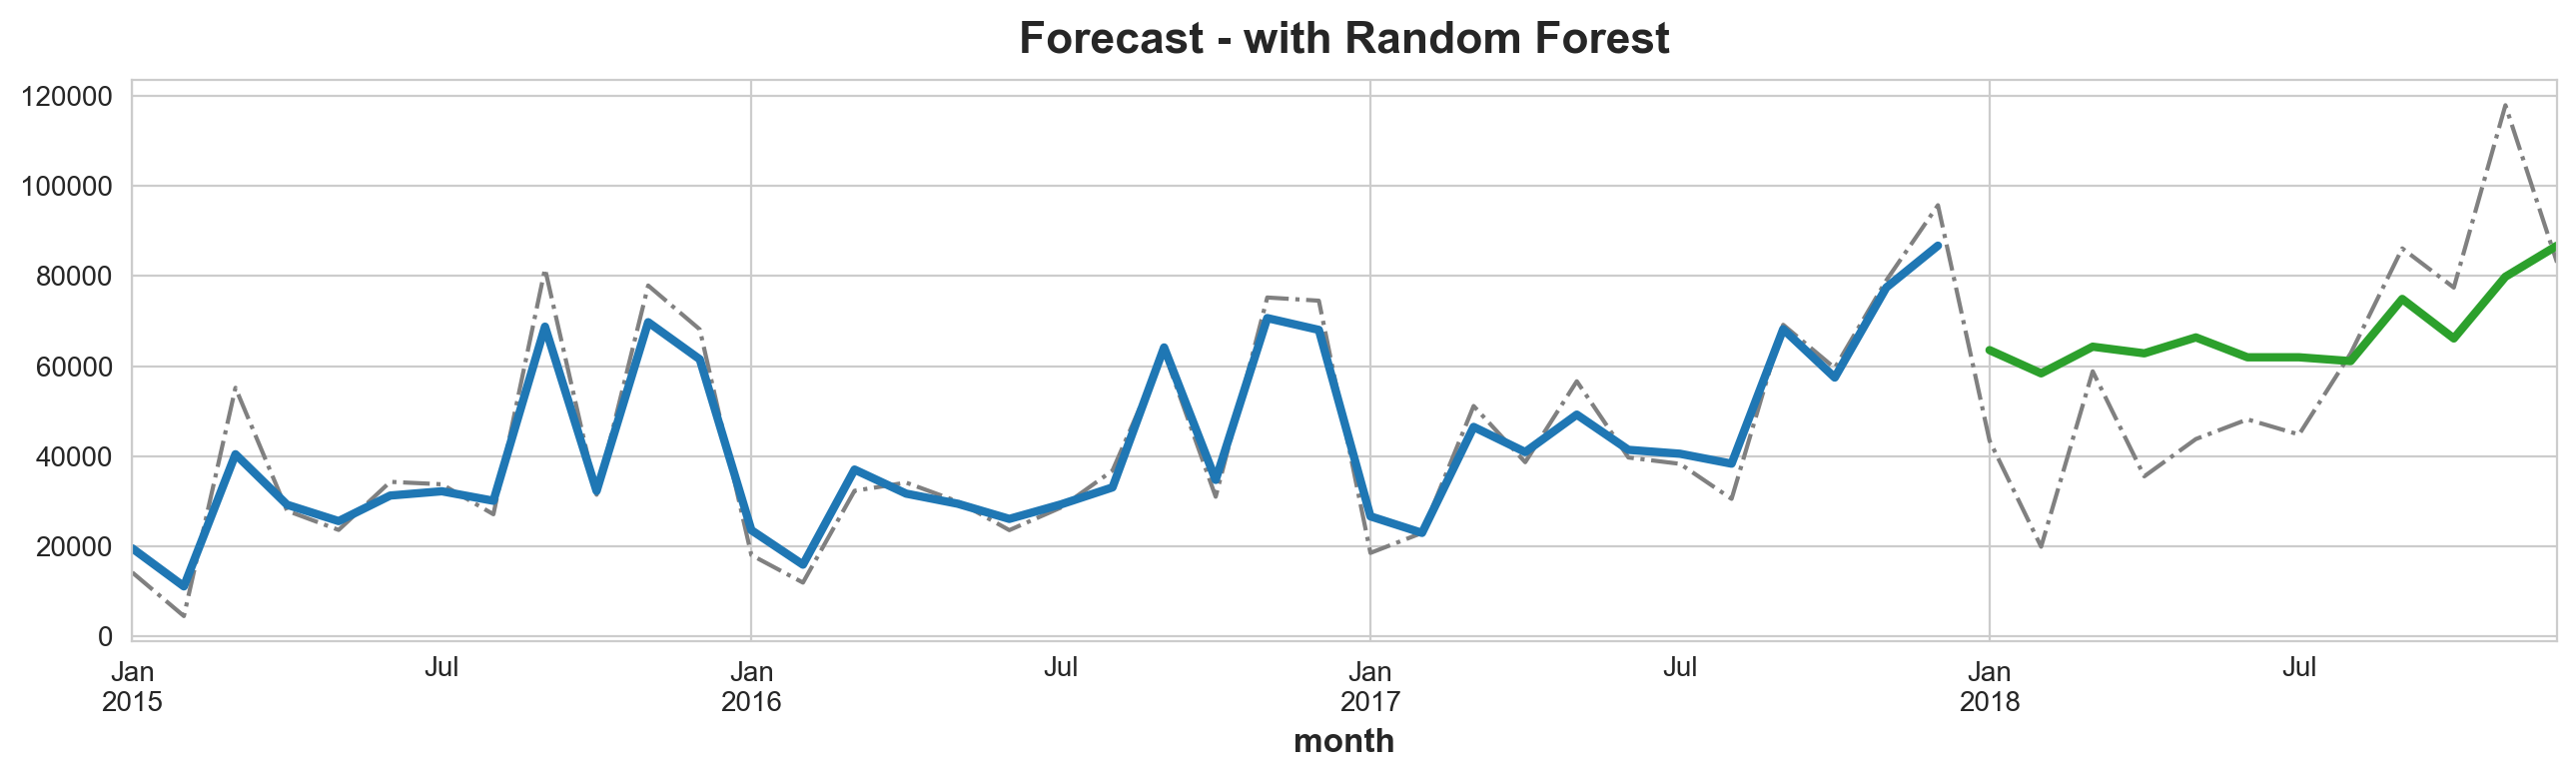

In [57]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 50)
rfr.fit(X_train, y_train)
y_pred1 = pd.Series(rfr.predict(X_train), X_train.index)
y_pred2 = pd.Series(rfr.predict(X_test), X_test.index)
r_squared_fit = r2_score(y_train,y_pred1)
r_squared_test = r2_score(y_test,y_pred2)

print(r_squared_fit)
print(r_squared_test)
ax = y.plot(style="-.", color="0.5", title="Forecast - with Random Forest")
ax = y_pred1.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred2.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
evaluate_model('Random Forest', y_test, y_pred2)

# Gradient Boosting Regressor

R2 score (train) for Gradient Boosting: 0.995074903710064
R2 score (test) for Gradient Boosting: 0.2697683990846179
       Model         |   R2   |  MAE   |     MSE      | MSLE |  MAPE  |  MEDAE   |   ME   |  EVS   |  MPL   | D2T  
Linear Regression    |  0.74  | 12015  | 176,200,603  | 0.06 |  0.24  |  10889   | 27115  |  0.79  |  6008  | 0.74 |
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808  | 0.04 |  0.18  |   9684   | 22623  |  0.77  |  5225  | 0.77 |
Random Forest        |  0.16  | 19888  | 562,741,726  | 0.22 |  0.50  |  20286   | 45029  |  0.31  |  9944  | 0.16 |
Gradient Boosting    |  0.27  | 19735  | 486,426,774  | 0.19 |  0.46  |  16728   | 36422  |  0.41  |  9867  | 0.27 |
SVM Regression       | -1.01  | 28319  | 1,338,610,859 | 0.42 |  0.42  |  19471   | 83699  | -0.00  | 14159  | -1.01 |
Random Forest        |  0.33  | 17574  | 447,816,235  | 0.18 |  0.43  |  15467   | 38481  |  0.41  |  8787  | 0.33 |
Gradient Boosting    |  0.27  | 19735  | 486,426,774  | 0.19 |  

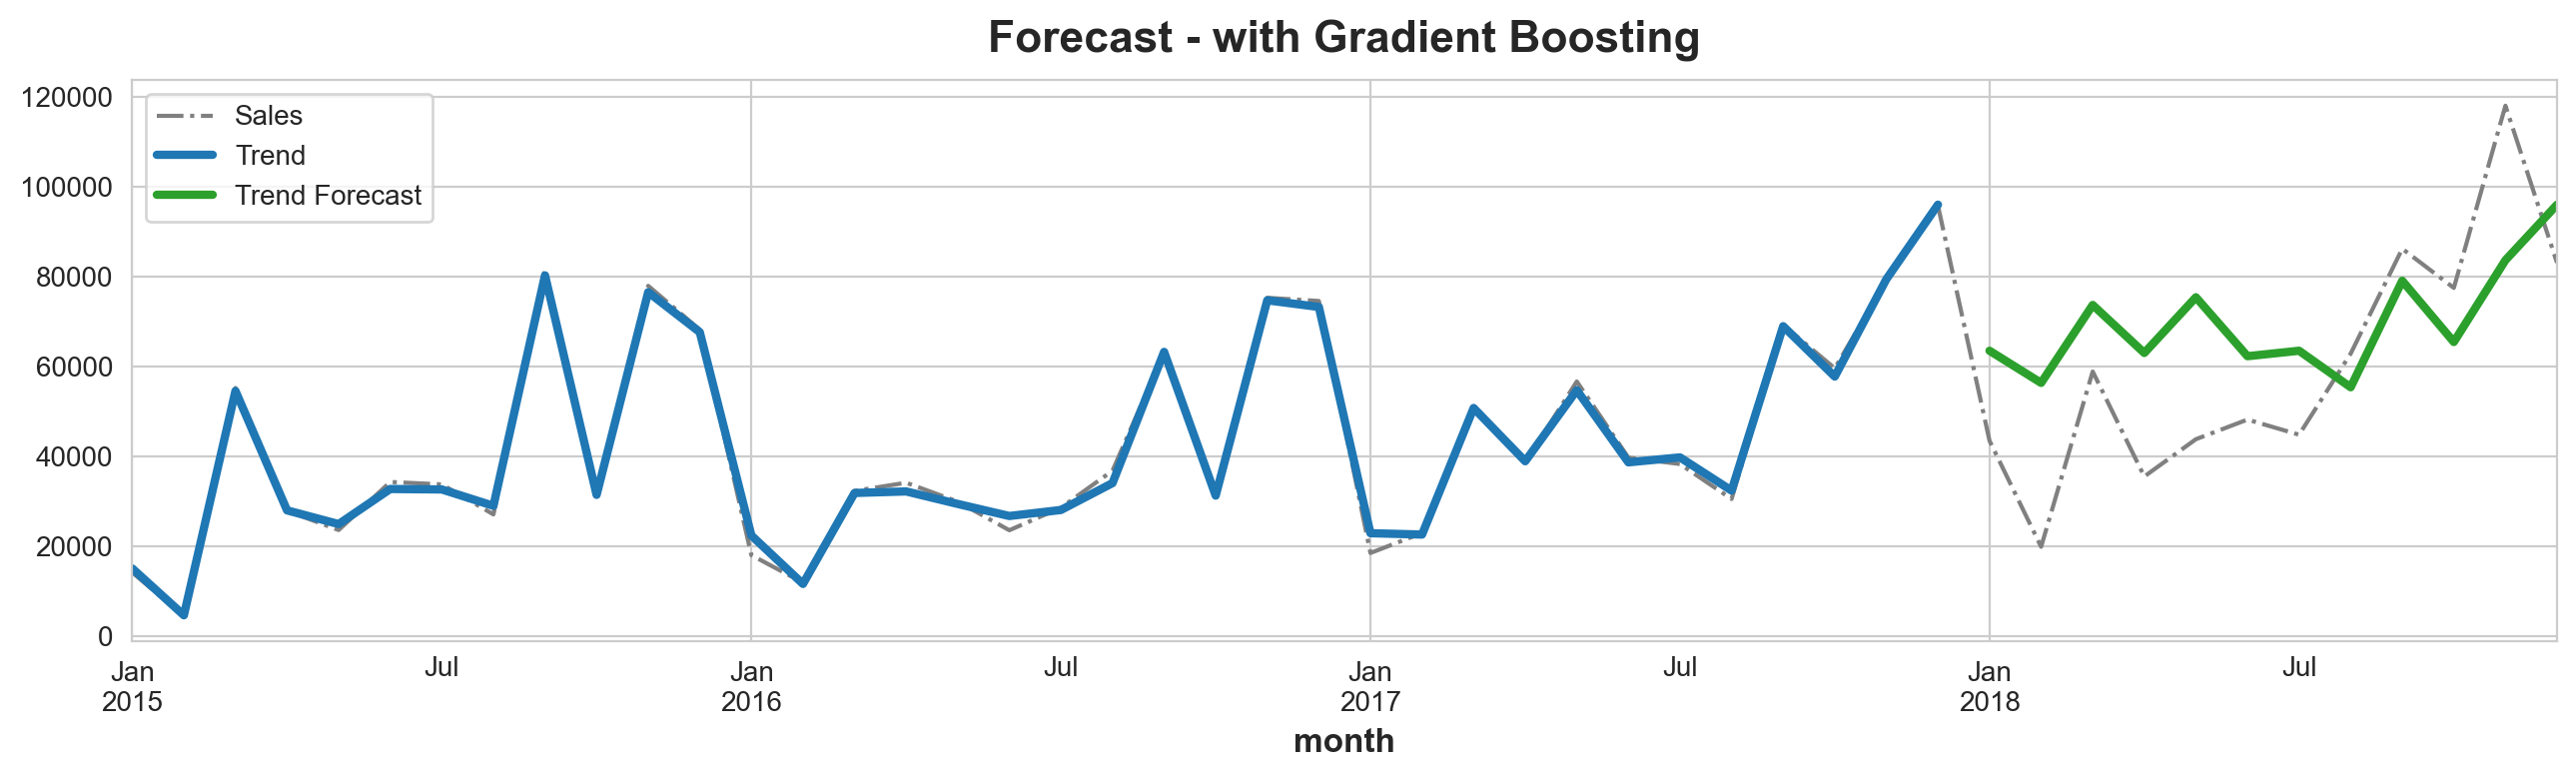

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred1_gbr = pd.Series(gbr.predict(X_train), index=X_train.index)
y_pred2_gbr = pd.Series(gbr.predict(X_test), index=X_test.index)
r_squared_fit_gbr = r2_score(y_train, y_pred1_gbr)
r_squared_test_gbr = r2_score(y_test, y_pred2_gbr)

print("R2 score (train) for Gradient Boosting:", r_squared_fit_gbr)
print("R2 score (test) for Gradient Boosting:", r_squared_test_gbr)

evaluate_model('Gradient Boosting', y_test, y_pred2_gbr)
ax = y.plot(style="-.", color="0.5", title="Forecast - with Gradient Boosting")
ax = y_pred1_gbr.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred2_gbr.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
plt.legend()
plt.show()


# Support Vector Machine Regressor

R2 score (train) for SVM Regression: -0.13350456925967769
R2 score (test) for SVM Regression: -1.0095438894024111
       Model         |   R2   |  MAE   |     MSE      | MSLE |  MAPE  |  MEDAE   |   ME   |  EVS   |  MPL   | D2T  
Linear Regression    |  0.74  | 12015  | 176,200,603  | 0.06 |  0.24  |  10889   | 27115  |  0.79  |  6008  | 0.74 |
Linear & AdaBoost    |  0.77  | 10450  | 152,353,808  | 0.04 |  0.18  |   9684   | 22623  |  0.77  |  5225  | 0.77 |
Random Forest        |  0.16  | 19888  | 562,741,726  | 0.22 |  0.50  |  20286   | 45029  |  0.31  |  9944  | 0.16 |
Gradient Boosting    |  0.27  | 19735  | 486,426,774  | 0.19 |  0.46  |  16728   | 36422  |  0.41  |  9867  | 0.27 |
SVM Regression       | -1.01  | 28319  | 1,338,610,859 | 0.42 |  0.42  |  19471   | 83699  | -0.00  | 14159  | -1.01 |


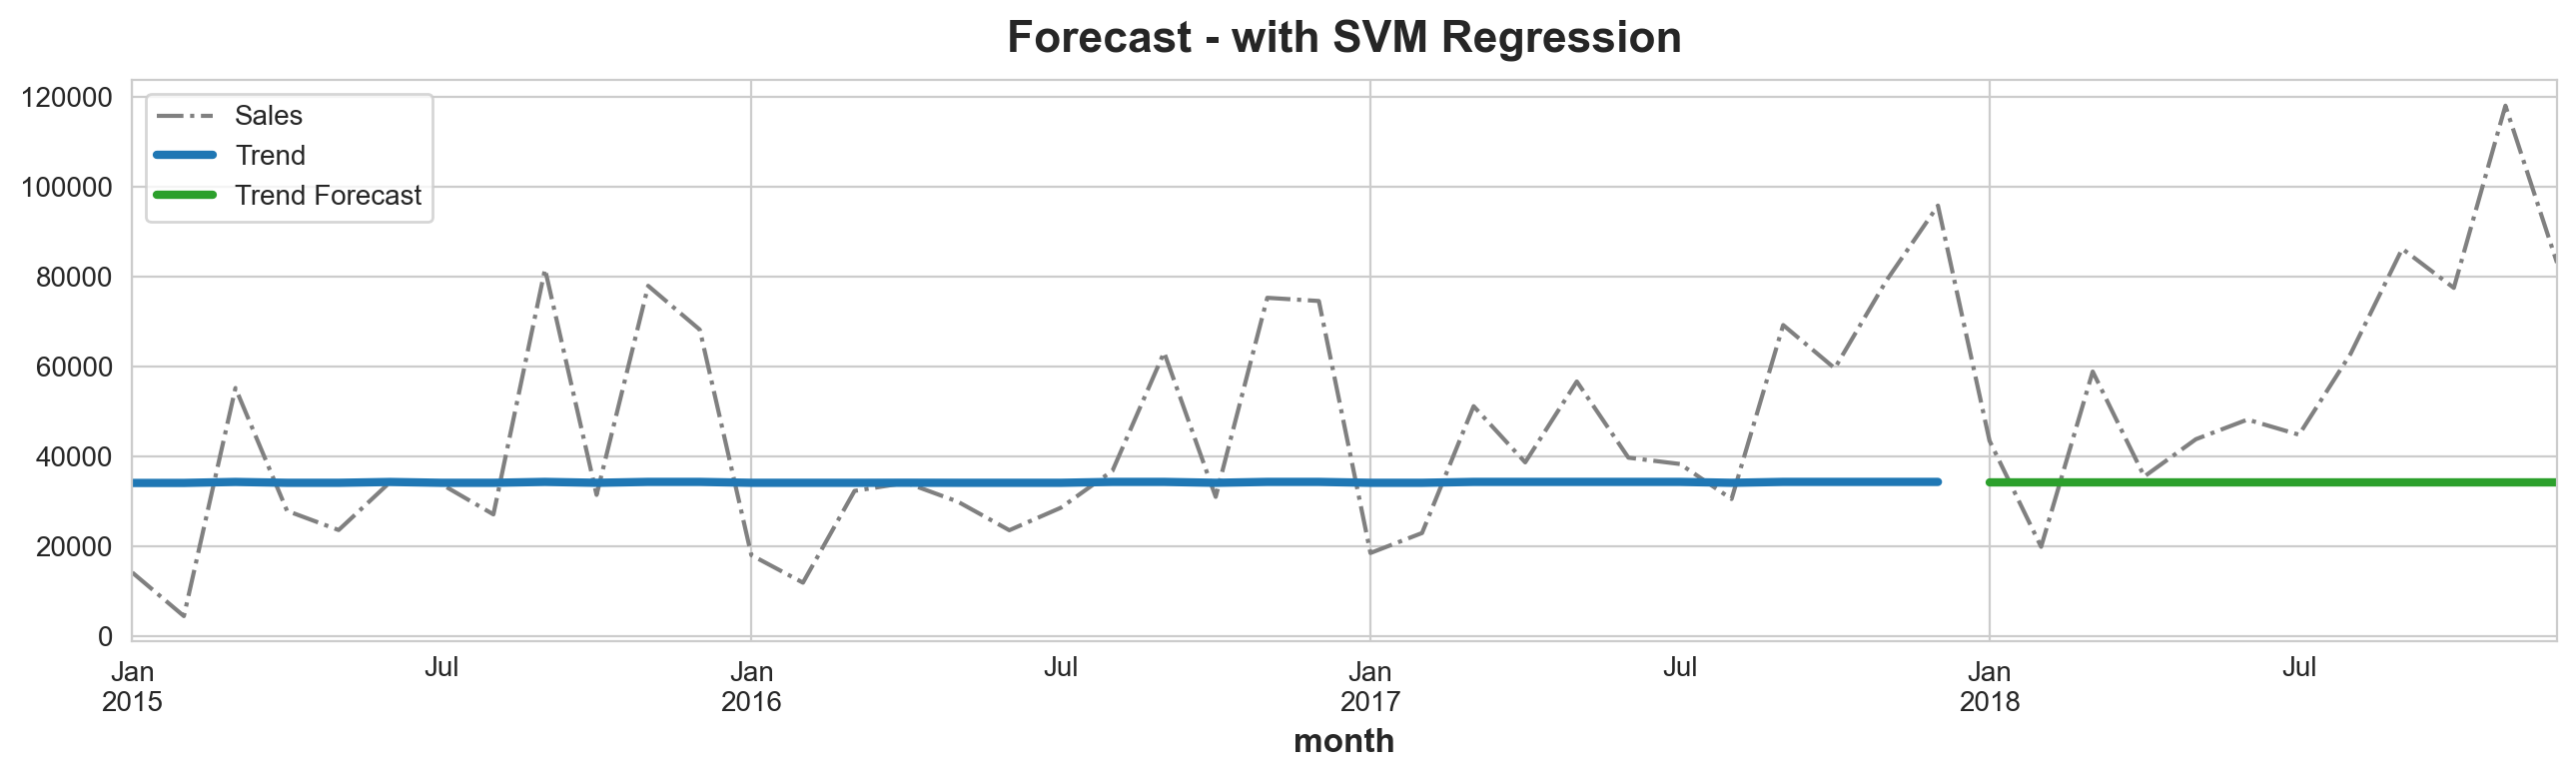

In [56]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='rbf', C=100, gamma=0.1)
svm_regressor.fit(X_train, y_train)
y_pred1_svm = pd.Series(svm_regressor.predict(X_train), index=X_train.index)
y_pred2_svm = pd.Series(svm_regressor.predict(X_test), index=X_test.index)
r_squared_fit_svm = r2_score(y_train, y_pred1_svm)
r_squared_test_svm = r2_score(y_test, y_pred2_svm)

print("R2 score (train) for SVM Regression:", r_squared_fit_svm)
print("R2 score (test) for SVM Regression:", r_squared_test_svm)

evaluate_model('SVM Regression', y_test, y_pred2_svm)
ax = y.plot(style="-.", color="0.5", title="Forecast - with SVM Regression")
ax = y_pred1_svm.plot(ax=ax, linewidth=3, label="Trend")
ax = y_pred2_svm.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C2')
plt.legend()
plt.show()
